In [2]:
##Figures for paper on the mean-field approximation of node influence
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import json
from matplotlib.lines import Line2D
import numpy as np
import math
from scipy.stats import pearsonr

In [3]:
#list method that ensures that s-unit combinations are in the correct order
#order is based on node number and state, starting with 0
def to_list(seed,smap,translator=None):
    """ determine the sunits involved in the seed, based on the sunit_map 
    this make take either a tuple of s-units, or a string of s-units (requires the translator argument)
    the smap maps individual node numbers to names, the translator maps seed strings to node numbers """
    
    ls = []
    if isinstance(seed,str):
        seed = translator[seed]
        
    for node in seed:
        ls.append(smap[node])
    return ls


#### Figure 1

In [4]:
#RBNs, T=10
errors_by_k={1: [0.0050999999999999995, 0.0038000000000000004, 0.0026999999999999997, 0.002, 0.0015, 0.0013000000000000002, 0.0008, 0.00030000000000000003, 0.0002, 0.0001, 0.0],
            2: [0.005199999999999999, 0.004000000000000001, 0.007600000000000001, 0.011199999999999998, 0.013000000000000001, 0.013900000000000001, 0.014600000000000002, 0.015000000000000003, 0.015100000000000002, 0.015000000000000003, 0.015300000000000003],
            3: [0.004999999999999999, 0.0046, 0.0060999999999999995, 0.0076, 0.0091, 0.0098, 0.010399999999999998, 0.010899999999999998, 0.0115, 0.011699999999999999, 0.011899999999999999]}

baselines_by_k={1: [0.049999999999999996, 0.03609999999999999, 0.0262, 0.0185, 0.013600000000000001, 0.009699999999999999, 0.006, 0.0025, 0.0014, 0.001, 0.0],
               2: [0.049999999999999996, 0.04369999999999999, 0.03849999999999999, 0.0346, 0.032299999999999995, 0.0306, 0.0295, 0.0294, 0.029199999999999997, 0.029099999999999997, 0.029199999999999997],
               3: [0.049999999999999996, 0.04709999999999999, 0.04539999999999999, 0.04479999999999999, 0.04419999999999999, 0.04339999999999999, 0.04299999999999999, 0.042499999999999996, 0.04229999999999999, 0.04189999999999999, 0.04179999999999999]}

In [5]:
#RBNs, T=15
errors_by_k={1: [0.0051, 0.0036, 0.0027, 0.0017, 0.0014, 0.0008, 0.0006, 0.0004, 0.0002, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0],
             2: [0.005, 0.0046, 0.0071, 0.0104, 0.013, 0.0144, 0.0148, 0.0156, 0.0155, 0.016, 0.0161, 0.0167, 0.0161, 0.0165, 0.0163, 0.0169],
             3: [0.005, 0.0046, 0.006, 0.0084, 0.0096, 0.0105, 0.0112, 0.0117, 0.0125, 0.0128, 0.0135, 0.0139, 0.0142, 0.0147, 0.0153, 0.0157]}
baselines_by_k={1: [0.05, 0.0364, 0.027, 0.0191, 0.0132, 0.0091, 0.0057, 0.003, 0.0015, 0.0009, 0.0007, 0.0005, 0.0, 0.0, 0.0, 0.0],
                2: [0.05, 0.0429, 0.0379, 0.034, 0.0316, 0.0301, 0.0298, 0.0294, 0.0292, 0.0291, 0.0293, 0.0291, 0.0292, 0.0291, 0.0292, 0.0292],
                3: [0.05, 0.0469, 0.0457, 0.0448, 0.0442, 0.0437, 0.043, 0.0425, 0.0422, 0.0417, 0.0415, 0.0411, 0.0409, 0.0406, 0.0404, 0.04]}

In [6]:
#RBNs, removed math.sqrt, M=100 models
errors_by_k={1: [0.002410000000000002, 0.001190000000000001, 0.0007400000000000005, 0.00016000000000000007, 2e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
             2: [0.0026300000000000017, 0.0019300000000000014, 0.005350000000000004, 0.012039999999999997, 0.018269999999999988, 0.021279999999999986, 0.023909999999999987, 0.026189999999999988, 0.026549999999999983, 0.02701999999999998, 0.027839999999999976, 0.029109999999999973, 0.028479999999999984, 0.02845999999999997, 0.02883999999999998, 0.03046999999999998], 
             3: [0.0024500000000000017, 0.002170000000000002, 0.003780000000000003, 0.006430000000000004, 0.009200000000000007, 0.011510000000000003, 0.013689999999999996, 0.015619999999999993, 0.01734999999999999, 0.019139999999999997, 0.020789999999999986, 0.02232999999999999, 0.02386999999999998, 0.025029999999999986, 0.026019999999999995, 0.027199999999999985]}
baselines_by_k={1: [0.25261, 0.12865999999999997, 0.06480999999999998, 0.03245999999999998, 0.01655999999999999, 0.008260000000000003, 0.0039400000000000025, 0.0019400000000000005, 0.0008, 0.00039000000000000005, 0.00013000000000000002, 6e-05, 0.0, 0.0, 0.0, 0.0], 
                2: [0.25242999999999993, 0.18847000000000005, 0.14966999999999997, 0.12458, 0.10987, 0.10016000000000005, 0.09528, 0.09320000000000002, 0.09286000000000001, 0.09195, 0.09150000000000004, 0.09124000000000004, 0.09197000000000001, 0.09144000000000002, 0.09102000000000007, 0.09115000000000004], 
                3: [0.2525899999999999, 0.22095999999999996, 0.20554000000000006, 0.19617999999999994, 0.18948000000000007, 0.18258000000000002, 0.17693000000000006, 0.17270000000000002, 0.16935, 0.16569, 0.16275000000000003, 0.16038999999999998, 0.15831, 0.15633999999999995, 0.15457999999999997, 0.15318999999999997]}

In [7]:
#Drosophila SPN
errors_by_s={0: #[0.01, 0.011, 0.011, 0.022, 0.024, 0.033, 0.032, 0.035, 0.032, 0.031],
             #[0.012, 0.012, 0.012, 0.021, 0.027, 0.029, 0.028, 0.033, 0.032, 0.032, 0.032, 0.034, 0.034, 0.034, 0.034, 0.034],
             [0.002, 0.002, 0.003, 0.014, 0.018, 0.022, 0.021, 0.025, 0.022, 0.021, 0.021, 0.022, 0.023, 0.023, 0.023, 0.022],
            1: [0.012, 0.01, 0.012, 0.02, 0.025, 0.028, 0.029, 0.031, 0.031, 0.031],
            2: [0.011, 0.01, 0.011, 0.019, 0.023, 0.026, 0.027, 0.029, 0.029, 0.03],
            3: [0.011, 0.009, 0.01, 0.017, 0.02, 0.023, 0.024, 0.026, 0.026, 0.027],
            4: [0.01, 0.009, 0.01, 0.015, 0.018, 0.021, 0.022, 0.023, 0.024, 0.024],
            5: [0.01, 0.008, 0.009, 0.013, 0.016, 0.017, 0.019, 0.019, 0.02, 0.02]}
baselines_by_s={0: #[0.122, 0.111, 0.113, 0.11, 0.111, 0.11, 0.112, 0.11, 0.112, 0.112],
                #[0.122, 0.112, 0.112, 0.108, 0.103, 0.106, 0.108, 0.106, 0.107, 0.107, 0.107, 0.107, 0.107, 0.107, 0.107, 0.107],
                [0.253, 0.223, 0.219, 0.207, 0.199, 0.207, 0.211, 0.208, 0.213, 0.212, 0.212, 0.212, 0.212, 0.212, 0.212, 0.212],
               1: [0.118, 0.107, 0.105, 0.101, 0.098, 0.099, 0.099, 0.098, 0.098, 0.098],
               2: [0.114, 0.101, 0.098, 0.093, 0.09, 0.09, 0.09, 0.089, 0.089, 0.089],
               3: [0.111, 0.095, 0.09, 0.085, 0.082, 0.082, 0.081, 0.081, 0.081, 0.081],
               4: [0.107, 0.089, 0.083, 0.078, 0.075, 0.074, 0.074, 0.074, 0.074, 0.074],
               5: [0.102, 0.084, 0.076, 0.071, 0.069, 0.068, 0.067, 0.067, 0.067, 0.067]}
#other GRNs
parasegment_errors=[0.007, 0.006, 0.007, 0.007, 0.008, 0.008, 0.009, 0.011, 0.011, 0.013, 0.014]
parasegment_baselines=[0.065, 0.059, 0.059, 0.058, 0.058, 0.058, 0.059, 0.06, 0.061, 0.061, 0.061]
#leukemia_errors=[0.006, 0.006, 0.008, 0.008, 0.009, 0.01, 0.009, 0.011, 0.012, 0.013]
#leukemia_baselines=[0.065, 0.058, 0.055, 0.053, 0.052, 0.052, 0.052, 0.053, 0.053, 0.054]
#leukemia_errors=[0.006, 0.005, 0.008, 0.008, 0.009, 0.009, 0.009, 0.011, 0.011, 0.012, 0.014, 0.014, 0.015, 0.016, 0.017, 0.017]
#leukemia_baselines=[0.065, 0.058, 0.055, 0.053, 0.053, 0.053, 0.052, 0.052, 0.053, 0.053, 0.053, 0.053, 0.053, 0.053, 0.053, 0.053]
leukemia_errors=[0.003, 0.002, 0.003, 0.004, 0.005, 0.005, 0.005, 0.006, 0.007, 0.007, 0.008, 0.009, 0.009, 0.01, 0.011, 0.014]
leukemia_baselines=[0.252, 0.202, 0.182, 0.169, 0.171, 0.172, 0.166, 0.168, 0.169, 0.173, 0.171, 0.174, 0.173, 0.172, 0.171, 0.175]
yeast_errors=[0.014, 0.019, 0.032, 0.043, 0.079, 0.109, 0.131, 0.142, 0.134, 0.105, 0.089]
yeast_baselines=[0.145, 0.134, 0.135, 0.138, 0.136, 0.123, 0.113, 0.11, 0.109, 0.108, 0.108]
#breast_errors=[0.005, 0.004, 0.007, 0.008, 0.009, 0.009, 0.009, 0.008, 0.009, 0.009, 0.01]
#breast_baselines=[0.056, 0.049, 0.048, 0.048, 0.048, 0.047, 0.046, 0.046, 0.046, 0.045, 0.045]
#breast_errors=[0.005, 0.004, 0.007, 0.01, 0.011, 0.011, 0.01, 0.01, 0.01, 0.011, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012]
#breast_baselines=[0.056, 0.049, 0.048, 0.048, 0.048, 0.048, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047]
breast_errors=[0.002, 0.001, 0.003, 0.006, 0.006, 0.007, 0.007, 0.007, 0.007, 0.008, 0.009, 0.01, 0.01, 0.01, 0.01, 0.011]
breast_baselines=[0.253, 0.185, 0.185, 0.184, 0.183, 0.18, 0.178, 0.173, 0.17, 0.17, 0.169, 0.169, 0.17, 0.17, 0.169, 0.168]

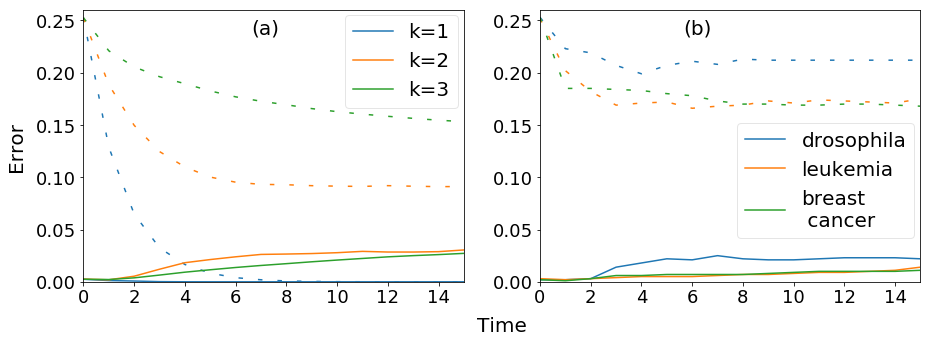

In [9]:
#RBNs
plt.figure(figsize=(15,5))
t=16
#fig=plt.figure
plt.subplot(121)
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for k in errors_by_k:
    plt.plot([i for i in range(t)],[error for error in errors_by_k[k][:t]],label='k='+str(k))
    plt.plot([i for i in range(t)],[error for error in baselines_by_k[k][:t]],'--',dashes=(3, 10),
             color=colors[k-1],markersize=10)
#plt.title('Performance by degree')
plt.ylabel("Error",fontsize=20,labelpad=10)
plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0,.26]) #[0,.051]
plt.xlim([0,t-1])
plt.legend(loc='upper right',fontsize=20,framealpha=0.5,bbox_to_anchor=(1.01, 1.02)) #bbox_to_anchor=(0.62, 0.5315)
#plt.show()

#Drosophila SPN
plt.subplot(122)
j=0
for k in errors_by_s:
    if k>0: continue #k==2 or k==4: continue #label='|X|='+str(k)
    plt.plot([i for i in range(t)],[error for error in errors_by_s[k][:t]],label='drosophila',color=colors[j])
    plt.plot([i for i in range(t)],[error for error in baselines_by_s[k][:t]],'--',dashes=(3, 10),
             color=colors[j],markersize=10)
    j+=1
#plt.plot([i for i in range(10)],parasegment_errors[:10],label='parasegment',color=colors[j])
#plt.plot([i for i in range(10)],parasegment_baselines[:10],'--',dashes=(3, 10),color=colors[j],markersize=10)
#j+=1
plt.plot([i for i in range(t)],leukemia_errors[:t],label='leukemia',color=colors[j])
plt.plot([i for i in range(t)],leukemia_baselines[:t],'--',dashes=(3, 10),color=colors[j],markersize=10)
j+=1
plt.plot([i for i in range(t)],breast_errors[:t],label='breast\n cancer',color=colors[j])
plt.plot([i for i in range(t)],breast_baselines[:t],'--',dashes=(3, 10),color=colors[j],markersize=10)
#plt.title('Performance by degree')
#plt.ylabel("Error",fontsize=16)
#plt.xlabel('Iterations',fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0,.26]) #[0,.13]
plt.xlim([0,t-1])
plt.legend(loc='upper right',fontsize=20,framealpha=0.5,bbox_to_anchor=(1.01, 0.62)) #bbox_to_anchor=(0.62, 0.5315)
#fig.text(.5, .05, "Caption", ha='center')
#plt.figtext(0.535, -0.1, "a) RBNs"+" "*52+" b) Drosophila SPN", wrap=True, horizontalalignment='center', fontsize=20)
plt.figtext(0.28, 0.815, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.68, 0.815, "(b)", wrap=True, horizontalalignment='left', fontsize=20) #0.69
#plt.show()
#plt.savefig('Figure1.pdf',format='pdf', bbox_inches='tight')

#### Figure 2

In [43]:
#drosophila entropies; READ in from json and get rid of unicode representations
entropies=json.load(open( "drosophila_entropies_s1.json" ))
seed_entropy={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
dsunit_map=json.load(open( "drosophila_dsunit_map.json" ))
dsunit_map={int(seed): str(dsunit_map[seed]) for seed in dsunit_map}
dtranslator=json.load(open( "drosophila_translator_s1.json" ))
dtranslator={str(seed): dtranslator[seed] for seed in dtranslator}
sorted_entropies=sorted(seed_entropy,key=lambda x: seed_entropy[x][20])

In [44]:
#breast cancer entropies; READ in from json and get rid of unicode representations
entropies=json.load(open( "breast_cancer_drug_entropies_abaseline.json" ))
bseed_entropy={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
bsunit_map=json.load(open( "breast_cancer_sunit_map.json" ))
bsunit_map={int(seed): str(bsunit_map[seed]) for seed in bsunit_map}
btranslator=json.load(open( "breast_cancer_drug_translator_abaseline.json" ))

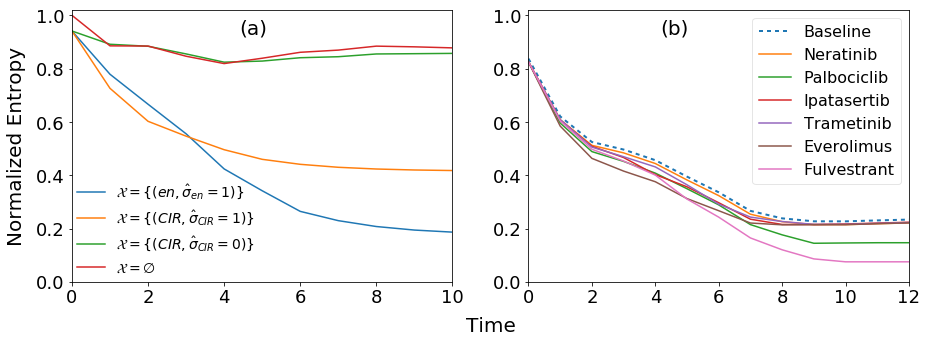

In [50]:
#Drosophila
plt.figure(figsize=(15,5))
plt.subplot(121)
iterations,length=11,1
#print 'Lowest:',sorted_entropies[0],[round(seed_entropy[sorted_entropies[0]][t],2) for t in seed_entropy[sorted_entropies[0]]],
#print to_list(sorted_entropies[0],dsunit_map,dtranslator)
#print 'Highest:',sorted_entropies[-1],[round(seed_entropy[sorted_entropies[-1]][t],2) for t in seed_entropy[sorted_entropies[-1]]],
#print to_list(sorted_entropies[-1],dsunit_map,dtranslator)
xvalues=range(iterations)
labels={"['en-1']": r'$\mathcal{X} = \{({en}, \hat{\sigma}_{en} = 1)\}$',
        "['CIR-1']": r'$\mathcal{X} = \{({CIR}, \hat{\sigma}_{CIR} = 1)\}$',
        "['CIR-0']": r'$\mathcal{X} = \{({CIR}, \hat{\sigma}_{CIR} = 0)\}$',
        "[]": r'$\mathcal{X} = \emptyset$'} #${X} = \{\}$
for index,seed in enumerate(sorted_entropies):
    name=str(to_list(seed,dsunit_map,dtranslator))
    if 'CIR' in name or 'en-1' in name or index==34:
        plt.plot(xvalues,[seed_entropy[seed][t] for t in xvalues],label=labels[name])#+', '+str(index))
    else:
        pass
        #plt.plot(xvalues,[seed_entropy[seed][t] for t in xvalues]) #print the other values
#plt.title("Entropy over time, s="+str(length))
plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.legend(loc='lower left',fontsize=14,framealpha=0.0,bbox_to_anchor=(-0.02, -0.02)) #bbox_to_anchor=(1.0, 0.95),loc='center right'
plt.figtext(0.28, 0.815, "(a)", wrap=True, horizontalalignment='left', fontsize=20)

#Breast Cancer
names=['Fulvestrant','Everolimus','Trametinib','Ipatasertib','Palbociclib','Neratinib','Baseline']
plt.subplot(122)
iterations=13
xvalues=range(iterations)
for index,seed in enumerate(sorted(bseed_entropy.keys(),reverse=True)):
    name=str(to_list(seed,bsunit_map,btranslator))
    if index==0: #baseline
        plt.plot(xvalues,[bseed_entropy[seed][t] for t in xvalues],'--',dashes=(2, 2),linewidth=2,label=names[len(names)-1])
    else:
        plt.plot(xvalues,[bseed_entropy[seed][t] for t in xvalues],label=names[len(names)-1-index])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.legend(loc='upper right',fontsize=16,framealpha=0.5,) #bbox_to_anchor=(1.0, 0.95),loc='center right'
plt.figtext(0.67, 0.815, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.savefig('Figure2.pdf',format='pdf', bbox_inches='tight') 

#### Figure 3

In [10]:
#Attractor simulation entropies
a0=[0.868455697904,0.518842797065,0.176096983125,0.0,0,0,0,0,0,0,0]
a1=[0.868455697904,0.518842797065,0.176096983125,0.0,0,0,0,0,0,0,0]
a2=[0.868455697904,0.527236912386,0.0575661173388,0.0,0,0,0,0,0,0,0]
a3=[0.868455697904,0.397671914472,0.232449221203,0.0574412040446,0.0,0,0,0,0,0,0] #label 4
a4=[0.868455697904,0.538263169476,0.283918032089,0.226572218813,0.193960013602,0.152862232704,0.153021742254,0.111096862935,0.0588184052648,0.0,0]
a5=[0.868455697904,0.397671914472,0.232449221203,0.174154643381,0.0586706816805,0.0,0,0,0,0,0]
a6=[0.868455697904,0.518842797065,0.176096983125,0.0,0,0,0,0,0,0,0]
a7=[0.868455697904,0.397671914472,0.232449221203,0.174154643381,0.154523692508,0.151235697568,0.0918802330235,0.0582533541442,0.0,0,0]
a8=[0.868455697904,0.538263169476,0.274748139745,0.216711468684,0.212127278766,0.157666521234,0.149526659165,0.106944876011,0.0588176563064,0.0,0]
a9=[0.868455697904,0.538263169476,0.274748139745,0.223046569844,0.190381172224,0.149263323655,0.105539528543,0.0586429240047,0.0,0,0]
random_selection=[0.88033439727280549,0.71547521879168885,0.59221683361830468,0.47743704460946873,0.40046065460869246,0.35337635285912106,0.29919824911561149,0.22773605669967212,0.18455349804156307,0.14592900054900379,0.11728803073319512]

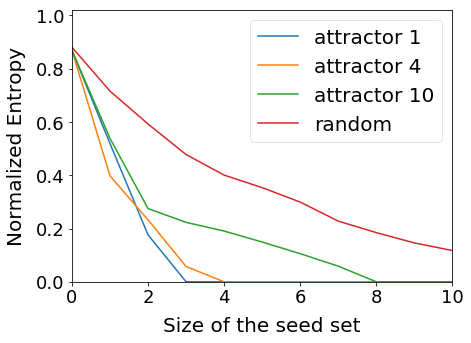

In [12]:
#Drosophila attractors
plt.figure(figsize=(15,5))
plt.subplot(121) #for consistent sizing
iterations=11
xvalues=range(iterations)
for i in range(10):
    if i==0 or i==3 or i==9:
        plt.plot(xvalues,eval('a'+str(i)),label='attractor '+str(i+1))
plt.plot(xvalues,random_selection,label='random')
plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
plt.xlabel('Size of the seed set',fontsize=20,labelpad=10) #'|X|'
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.legend(loc='upper right',fontsize=20,framealpha=0.5)

#### Figure 4

In [13]:
#RBNs
drivers_by_n={2: {10: {'resolved': 6.9, 'size': 2.0, 'time': 0.48640005588531493},
  20: {'resolved': 14.9, 'size': 4.3, 'time': 4.195599985122681},
  30: {'resolved': 21.1, 'size': 5.5, 'time': 12.41659996509552},
  40: {'resolved': 28.6, 'size': 7.6, 'time': 29.729500007629394},
  50: {'resolved': 33.5, 'size': 8.8, 'time': 51.62620000839233},
  60: {'resolved': 36.4, 'size': 9.8, 'time': 84.1125},
  70: {'resolved': 49.7, 'size': 13.3, 'time': 157.4107999563217},
  80: {'resolved': 54.2, 'size': 15.0, 'time': 229.58289997577668},
 90: {'resolved': 61.0, 'size': 15.2, 'time': 279.3986000061035},
 100: {'resolved': 62.5, 'size': 18.9, 'time': 423.22820003032683}},
3: {10: {'resolved': 9.7, 'size': 2.6, 'time': 0.7258000135421753},
  20: {'resolved': 17.2, 'size': 5.2, 'time': 5.456900024414063},
  30: {'resolved': 28.1, 'size': 7.3, 'time': 16.93459997177124},
  40: {'resolved': 36.1, 'size': 10.2, 'time': 41.94920003414154},
  50: {'resolved': 45.1, 'size': 13.5, 'time': 84.15349996089935},
  60: {'resolved': 52.3, 'size': 15.3, 'time': 142.3023999929428},
  70: {'resolved': 61.3, 'size': 17.6, 'time': 219.80340003967285},
  80: {'resolved': 67.8, 'size': 19.7, 'time': 321.7},
  90: {'resolved': 82.2, 'size': 24.4, 'time': 491.98109996318817},
  100: {'resolved': 87.2, 'size': 26.0, 'time': 664.6181999921798}},
4: {10: {'resolved': 7.8, 'size': 3.4, 'time': 0.8815000534057618},
  20: {'resolved': 14.7, 'size': 6.6, 'time': 6.716700005531311},
  30: {'resolved': 25.2, 'size': 10.3, 'time': 24.504200053215026},
  40: {'resolved': 35.0, 'size': 13.5, 'time': 55.25819997787475},
  50: {'resolved': 36.3, 'size': 16.7, 'time': 111.00950000286102},
  60: {'resolved': 50.5, 'size': 19.8, 'time': 185.90720002651216},
  70: {'resolved': 50.1, 'size': 23.1, 'time': 293.58609998226166},
  80: {'resolved': 63.1, 'size': 26.9, 'time': 449.7540999650955},
  90: {'resolved': 69.0, 'size': 30.8, 'time': 644.0180000066757},
  100: {'resolved': 74.0, 'size': 33.3, 'time': 870.2704999685287}},
5: {10: {'resolved': 8.1, 'size': 3.9, 'time': 1.1397000074386596},
  20: {'resolved': 17.6, 'size': 8.2, 'time': 9.332299971580506},
  30: {'resolved': 23.5, 'size': 11.7, 'time': 30.178299999237062},
  40: {'resolved': 29.7, 'size': 15.8, 'time': 73.03140001296997},
  50: {'resolved': 36.8, 'size': 19.9, 'time': 143.53889999389648},
  60: {'resolved': 47.5, 'size': 24.3, 'time': 244.39649999141693},
  70: {'resolved': 49.4, 'size': 27.2, 'time': 379.15459995269777},
  80: {'resolved': 62.9, 'size': 31.9, 'time': 580.4942000389099},
  90: {'resolved': 67.3, 'size': 36.0, 'time': 822.3061000108719},
  100: {'resolved': 74.0, 'size': 39.7, 'time': 1134.5489999771119}}}
drivers_by_bias={2.0: [0.0, 0.56, 1.67, 2.77, 3.48, 3.71], 3.0: [0.0, 0.77, 2.3, 3.58, 4.83, 5.18]}

In [14]:
#Cell Collective; READ in from json and get rid of unicode representations
cell_stats=json.load(open( "cell_collective_statistics.json" ))
cell_stats={str(n): {str(key): cell_stats[n][key] for key in cell_stats[n]} for n in cell_stats}
cell_drivers=json.load(open( "cell_collective_drivers.json" ))
cell_drivers={str(n): {str(key): cell_drivers[n][key] for key in cell_drivers[n]} for n in cell_drivers}
len(cell_drivers)

with open('cell_collective_drivers_avg_attractor.txt') as f:
    drivers=eval(f.read())
#add in drosophila to cell_drivers
cell_drivers['Body Segmentation In Drosophila 2013']={'resolved': None, 'size': 3, 'time': None}
len(drivers)

43

(-0.21904412328901357, 0.06078587552226582)


Text(0.82,0.88,'(c)')

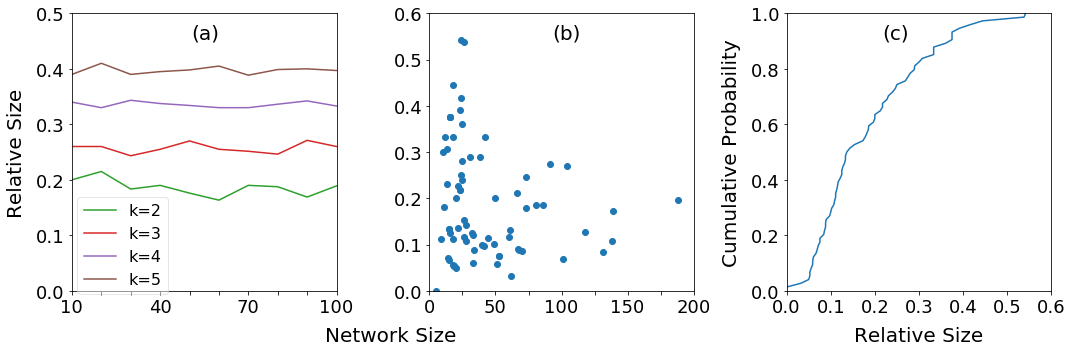

In [15]:
#RBNs, Drivers over n
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,5))
plt.subplot(131)
xvalues=[10,20,30,40,50,60,70,80,90,100]
for i,key in enumerate(drivers_by_n):
    plt.plot(xvalues,[drivers_by_n[key][n]['size']/n for n in xvalues],label='k='+str(key),color=colors[i+2])
plt.ylabel("Relative Size",fontsize=20,labelpad=10)
#plt.xlabel('Network Size',fontsize=20,labelpad=10,) #position=(1.3,1)
plt.xticks([10*i for i in range(11)],[0,10,'','',40,'','',70,'','',100],fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([10,100])
plt.ylim([0,0.5])
plt.legend(loc='lower left',fontsize=16,framealpha=0.5,bbox_to_anchor=(-0.01, -0.04))

#RBNs, Drivers over k
#plt.subplot(132)
#biases=[0,.1,.2,.3,.4,.5]
#for i,key in enumerate(drivers_by_bias):
#    plt.plot(biases,[s/20 for s in drivers_by_bias[key]],label='k='+str(int(key)),color=colors[i])
#plt.xlabel('Bias',fontsize=20,labelpad=10)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xlim([0,0.5])
#plt.ylim([0,0.27])
#plt.legend(loc='upper left',fontsize=18,framealpha=0.5,)


#Cell Collective
plt.subplot(132)
#stat-based coloring
subnetworks=[n for n in cell_stats if cell_stats[n]['max_k']] #if cell_stats[n.name]['max_k']>=9
labels=[int(round(cell_stats[n]['avg_k'])) for n in subnetworks] #SPECIFY STAT
#labels=[int(round(cell_stats[n][stat],1)*10) for n in subnetworks] #for avg_bias
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lcolors=[colors[x-min(labels)] for x in labels]
legend_labels=['k='+str(l) for l in set(sorted(labels))]
#legend_labels=[l/10.0 for l in set(sorted(labels))] #for avg_bias
legend_pts=[Line2D([], [], marker='o', color='w', label=col, markerfacecolor=col, markersize=10) for col in colors if col in lcolors]
#graph cell collective values
xvalues=[cell_stats[n]['size'] for n in subnetworks]
yvalues=[cell_drivers[n]['size']/float(cell_stats[n]['size']) for n in subnetworks]
plt.scatter(xvalues,yvalues)#,color=lcolors)
print pearsonr(xvalues,yvalues)
plt.ylim([0,.6])
plt.xlim([0,200]) #one outlier of size 321
#plt.xlabel('Network Size',fontsize=20,labelpad=10)
plt.xticks([0,25,50,75,100,125,150,175,200],[0,'',50,'',100,'',150,'',200],fontsize=18)
plt.yticks(fontsize=18)
#plt.legend(legend_pts,legend_labels,loc='upper right',fontsize=16,framealpha=0.5,)

#Cell Collective, CDF
plt.subplot(133)
sorted_networks=sorted(cell_stats,key=lambda x: float(cell_drivers[x]['size'])/cell_stats[x]['size'])
#for n in sorted_networks: print n,float(cell_drivers[n]['size'])/cell_stats[n]['size']
dvalues=[float(cell_drivers[n]['size'])/cell_stats[n]['size'] for n in sorted_networks]
yvalues=[float(i+1)/len(dvalues) for i in range(len(dvalues))]
plt.plot(dvalues,yvalues)
plt.ylabel("Cumulative Probability",fontsize=20,labelpad=10)
plt.xlabel('Relative Size',fontsize=20,labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,0.6])
plt.ylim([0,1.0])
plt.tight_layout()
plt.figtext(0.365, 0.041, "Network Size", wrap=True, horizontalalignment='center', fontsize=20)
plt.figtext(0.18, 0.88, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.515, 0.88, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.82, 0.88, "(c)", wrap=True, horizontalalignment='left', fontsize=20) #0.83

(-0.21904412328901357, 0.06078587552226582)


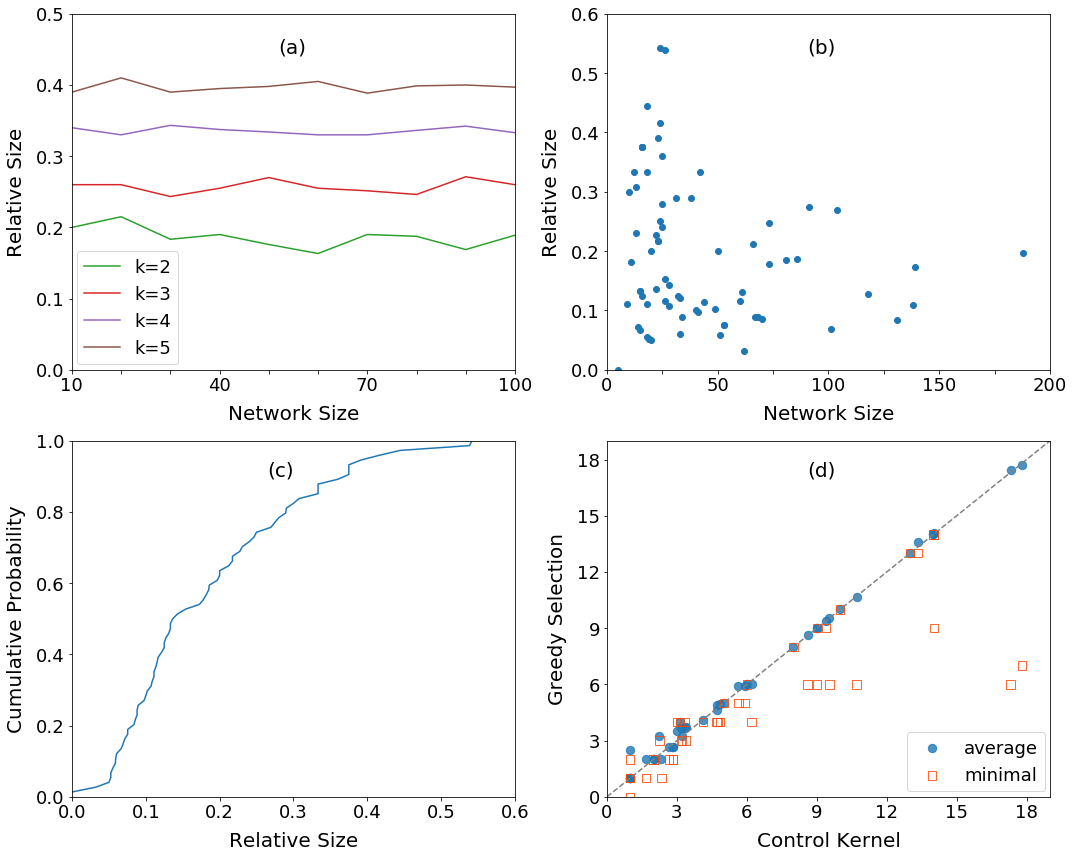

In [54]:
#alternate 2x2 figure
#RBNs, Drivers over n
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,12))
plt.subplot(221)
xvalues=[10,20,30,40,50,60,70,80,90,100]
for i,key in enumerate(drivers_by_n):
    plt.plot(xvalues,[drivers_by_n[key][n]['size']/n for n in xvalues],label='k='+str(key),color=colors[i+2])
plt.ylabel("Relative Size",fontsize=20,labelpad=10)
plt.xlabel('Network Size',fontsize=20,labelpad=10) #position=(1.3,1)
plt.xticks([10*i for i in range(11)],[0,10,'','',40,'','',70,'','',100],fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([10,100])
plt.ylim([0,0.5])
plt.legend(loc='lower left',fontsize=18,framealpha=0.8,bbox_to_anchor=(-0.01, -0.01))

#Cell Collective
plt.subplot(222)
#stat-based coloring
subnetworks=[n for n in cell_stats if cell_stats[n]['max_k']] #if cell_stats[n.name]['max_k']>=9
labels=[int(round(cell_stats[n]['avg_k'])) for n in subnetworks] #SPECIFY STAT
#labels=[int(round(cell_stats[n][stat],1)*10) for n in subnetworks] #for avg_bias
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lcolors=[colors[x-min(labels)] for x in labels]
legend_labels=['k='+str(l) for l in set(sorted(labels))]
#legend_labels=[l/10.0 for l in set(sorted(labels))] #for avg_bias
legend_pts=[Line2D([], [], marker='o', color='w', label=col, markerfacecolor=col, markersize=10) for col in colors if col in lcolors]
#graph cell collective values
xvalues=[cell_stats[n]['size'] for n in subnetworks]
yvalues=[cell_drivers[n]['size']/float(cell_stats[n]['size']) for n in subnetworks]
plt.scatter(xvalues,yvalues)#,color=lcolors)
print pearsonr(xvalues,yvalues)
plt.ylim([0,.6])
plt.xlim([0,200]) #one outlier of size 321
plt.ylabel("Relative Size",fontsize=20,labelpad=10)
plt.xlabel('Network Size',fontsize=20,labelpad=10)
plt.xticks([0,25,50,75,100,125,150,175,200],[0,'',50,'',100,'',150,'',200],fontsize=18)
plt.yticks(fontsize=18)

#Cell Collective, CDF
plt.subplot(223)
sorted_networks=sorted(cell_stats,key=lambda x: float(cell_drivers[x]['size'])/cell_stats[x]['size'])
#for n in sorted_networks: print n,float(cell_drivers[n]['size'])/cell_stats[n]['size']
dvalues=[float(cell_drivers[n]['size'])/cell_stats[n]['size'] for n in sorted_networks]
yvalues=[float(i+1)/len(dvalues) for i in range(len(dvalues))]
plt.plot(dvalues,yvalues)
plt.ylabel("Cumulative Probability",fontsize=20,labelpad=10)
plt.xlabel('Relative Size',fontsize=20,labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,0.6])
plt.ylim([0,1.0])
plt.tight_layout(pad=1.0)
#plt.figtext(0.52, 0.48, "Network Size", wrap=True, horizontalalignment='center', fontsize=20)

#Cell Collective, IBMFA compared to control kernels
xvalues=range(len(drivers))
sorted_networks=sorted(drivers,key=lambda x: drivers[x]['kernel'])
#for n in sorted_networks: print n,drivers[n]['kernel']
yvalues1=[drivers[n]['greedy'] for n in sorted_networks]
yvalues2=[drivers[n]['kernel'] for n in sorted_networks]
yvalues3=[cell_drivers[n]['size'] for x in sorted_networks for n in cell_drivers if x.lower()==n.lower()]
#print len(yvalues1)

plt.subplot(224)
plt.scatter(yvalues2,yvalues1,alpha=0.8,s=70,label='average')
plt.scatter(yvalues2,yvalues3,alpha=0.8,marker='s',facecolors='none',edgecolors='orangered',s=70,label='minimal')
plt.plot(xvalues[:20],xvalues[:20],'--',color='grey') #x=y line, also acts as an axis limit
plt.ylabel("Greedy Selection",fontsize=20,labelpad=10)
plt.xlabel("Control Kernel",fontsize=20,labelpad=10)
plt.xticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18) #ticks, labels
plt.yticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18)
plt.xlim([0,19])
plt.ylim([0,19])
#plt.title("Comparison of IBMFA Average to Network Control Kernels", y=1.05)
plt.legend(loc='lower right',fontsize=18,framealpha=0.8,bbox_to_anchor=(1.01, -0.01))

plt.figtext(0.26, 0.935, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.75, 0.935, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.25, 0.445, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.75, 0.445, "(d)", wrap=True, horizontalalignment='left', fontsize=20)
plt.savefig('Figure4.pdf',format='pdf', bbox_inches='tight')

### Supplementary Materials

#### Figure 1

In [5]:
#drosophila entropies; READ in from json and get rid of unicode representations
entropies=json.load(open( "drosophila_entropies_s1.json" ))
seed_entropy={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_entropies_s3.json" ))
seed_entropy3={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
dsunit_map=json.load(open( "drosophila_dsunit_map.json" ))
dsunit_map={int(seed): str(dsunit_map[seed]) for seed in dsunit_map}
dtranslator=json.load(open( "drosophila_translator_s3.json" ))
dtranslator={str(seed): dtranslator[seed] for seed in dtranslator}
sorted_entropies=sorted(seed_entropy,key=lambda x: seed_entropy[x][20])
sorted_entropies3=sorted(seed_entropy3,key=lambda x: seed_entropy3[x][20])

Text(0.71,0.815,'(b)')

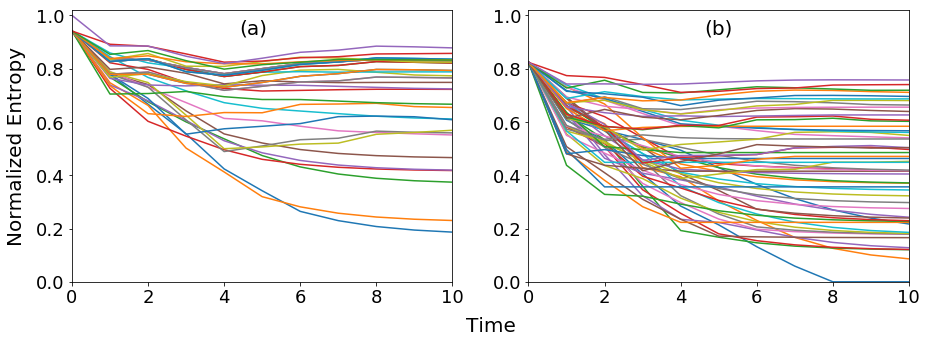

In [6]:
#Drosophila, size=1
plt.figure(figsize=(15,5))
plt.subplot(121)
iterations,length=11,1
#print 'Lowest:',sorted_entropies[0],[round(seed_entropy[sorted_entropies[0]][t],2) for t in seed_entropy[sorted_entropies[0]]],
#print to_list(sorted_entropies[0],dsunit_map,dtranslator)
#print 'Highest:',sorted_entropies[-1],[round(seed_entropy[sorted_entropies[-1]][t],2) for t in seed_entropy[sorted_entropies[-1]]],
#print to_list(sorted_entropies[-1],dsunit_map,dtranslator)
xvalues=range(iterations)
for index,seed in enumerate(sorted_entropies):
    name=str(to_list(seed,dsunit_map,dtranslator))
    plt.plot(xvalues,[seed_entropy[seed][t] for t in xvalues])#+', '+str(index))
#plt.title("Entropy over time, s="+str(length))
plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.legend(loc='lower left',fontsize=14,framealpha=0.0,bbox_to_anchor=(-0.02, -0.02)) #bbox_to_anchor=(1.0, 0.95),loc='center right'
plt.figtext(0.28, 0.815, "(a)", wrap=True, horizontalalignment='left', fontsize=20)

#Drosophila, size=3
plt.subplot(122)
for index,seed in enumerate(sorted_entropies3):
    name=str(to_list(seed,dsunit_map,dtranslator))
    if index%100==0:
        plt.plot(xvalues,[seed_entropy3[seed][t] for t in xvalues])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.figtext(0.71, 0.815, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

#### Figure 2

In [7]:
#leukemia entropies; READ in from json and get rid of unicode representations
entropies=json.load(open( "leukemia_entropies_s1.json" ))
seed_entropy={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "leukemia_entropies_s3_sample269.json" ))
seed_entropy3={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
lsunit_map=json.load(open( "leukemia_sunit_map.json" ))
lsunit_map={int(seed): str(lsunit_map[seed]) for seed in lsunit_map}
ltranslator=json.load(open( "leukemia_translator_s3_sample269.json" ))
ltranslator={str(seed): ltranslator[seed] for seed in ltranslator}
sorted_entropies=sorted(seed_entropy,key=lambda x: seed_entropy[x][10])
sorted_entropies3=sorted(seed_entropy3,key=lambda x: seed_entropy3[x][10])

Text(0.71,0.815,'(b)')

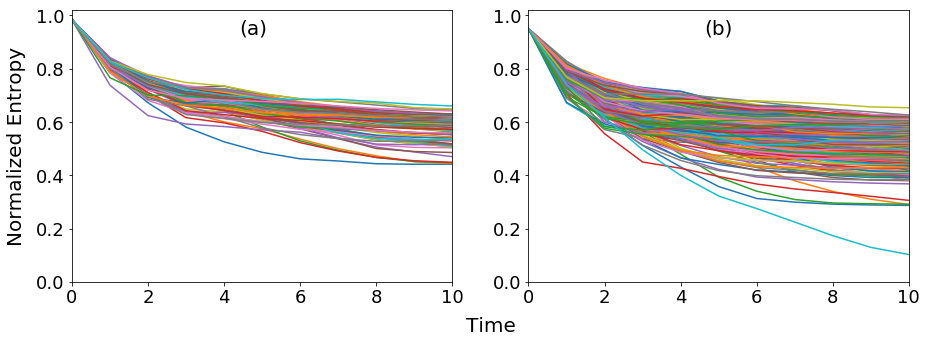

In [8]:
#Leukemia, size=1
plt.figure(figsize=(15,5))
plt.subplot(121)
iterations,length=11,1
#print 'Lowest:',sorted_entropies[0],[round(seed_entropy[sorted_entropies[0]][t],2) for t in seed_entropy[sorted_entropies[0]]],
#print to_list(sorted_entropies[0],lsunit_map,ltranslator)
#print 'Highest:',sorted_entropies[-1],[round(seed_entropy[sorted_entropies[-1]][t],2) for t in seed_entropy[sorted_entropies[-1]]],
#print to_list(sorted_entropies[-1],lsunit_map,ltranslator)
xvalues=range(iterations)
for index,seed in enumerate(sorted_entropies):
    name=str(to_list(seed,lsunit_map,ltranslator))
    plt.plot(xvalues,[seed_entropy[seed][t] for t in xvalues])#+', '+str(index))
#plt.title("Entropy over time, s="+str(length))
plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.legend(loc='lower left',fontsize=14,framealpha=0.0,bbox_to_anchor=(-0.02, -0.02)) #bbox_to_anchor=(1.0, 0.95),loc='center right'
plt.figtext(0.28, 0.815, "(a)", wrap=True, horizontalalignment='left', fontsize=20)

#Leukemia, size=3
plt.subplot(122)
lowest=[s/60 for s in [57.0, 44.41, 36.98, 29.73, 23.97, 19.31, 16.48, 13.45, 10.38, 7.75, 6.13]]
for index,seed in enumerate(sorted_entropies3):
    name=str(to_list(seed,lsunit_map,ltranslator))
    if index%1==0:
        plt.plot(xvalues,[seed_entropy3[seed][t] for t in xvalues])
plt.plot(xvalues,lowest) #include lowest entropy line
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.figtext(0.71, 0.815, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

#### Figure 3

In [294]:
#node entropies
entropies1=json.load(open( "drosophila_simulations_node_entropies_s0.json" ))
entropies2=json.load(open( "drosophila_node_entropies_s0.json" ))
entropies5={str(seed): {str(key): {int(t):entropies1[seed][key][t] for t in entropies1[seed][key]} for key in entropies1[seed]} for seed in entropies1}
entropies6={str(seed): {str(key): {int(t):entropies2[seed][key][t] for t in entropies2[seed][key]} for key in entropies2[seed]} for seed in entropies2}

entropies1=json.load(open( "drosophila_simulations_node_entropies_s1.json" ))
entropies2=json.load(open( "drosophila_node_entropies_s1.json" ))
entropies3={str(seed): {str(key): {int(t):entropies1[seed][key][t] for t in entropies1[seed][key]} for key in entropies1[seed]} for seed in entropies1}
entropies4={str(seed): {str(key): {int(t):entropies2[seed][key][t] for t in entropies2[seed][key]} for key in entropies2[seed]} for seed in entropies2}

entropies1=json.load(open( "drosophila_simulations_node_entropies_s2.json" ))
entropies2=json.load(open( "drosophila_node_entropies_s2.json" ))
entropies1={str(seed): {str(key): {int(t):entropies1[seed][key][t] for t in entropies1[seed][key]} for key in entropies1[seed]} for seed in entropies1}
entropies2={str(seed): {str(key): {int(t):entropies2[seed][key][t] for t in entropies2[seed][key]} for key in entropies2[seed]} for seed in entropies2}
dnodes=['wg', 'WG', 'ci', 'en', 'nWG', 'ptc', 'SLP', 'HH', 'CI', 'SMO', 'CIR', 'hh', 'EN', 'nhhnHH', 'PH', 'PTC', 'CIA']
#configuration entropies
entropies=json.load(open( "drosophila_simulations_entropies_s0.json" ))
seed_entropy5={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_simulations_entropies_s1.json" ))
seed_entropy3={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_entropies_s1.json" ))
seed_entropy4={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}

entropies=json.load(open( "drosophila_simulations_entropies_s2.json" ))
seed_entropy1={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_entropies_s2.json" ))
seed_entropy2={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}


Text(0.71,0.425,'(d)')

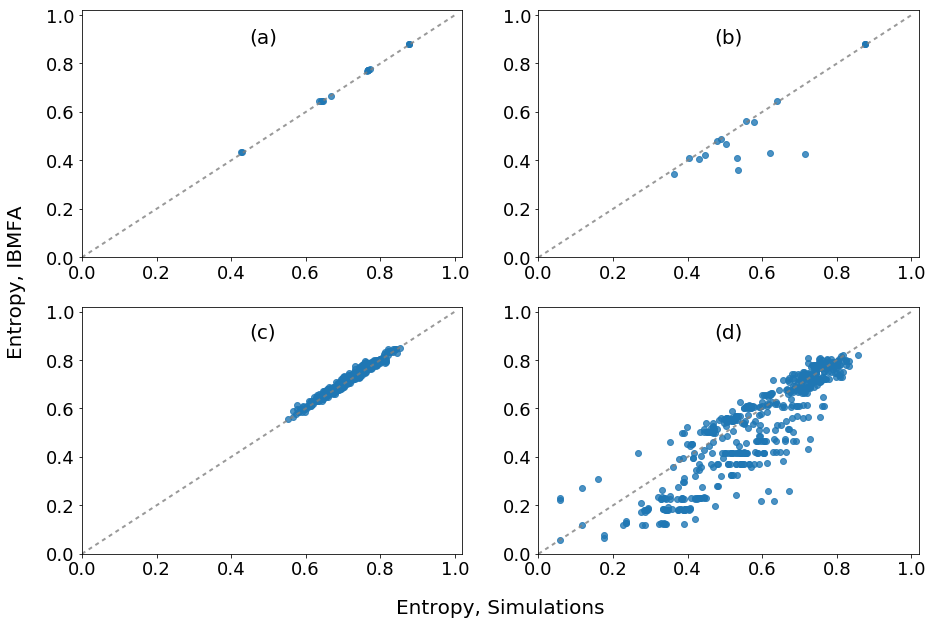

In [297]:
#Drosophila correlation of node entropy
plt.figure(figsize=(15,10))
plt.subplot(221)
for t in (1,10):
    if t==10:
        plt.subplot(222)
        #plt.yticks([0,.2,.4,.6,.8,1],[],fontsize=18) #remove labels
    avg1=[np.mean([entropies5[seed][node][t] for seed in entropies5]) for node in dnodes]
    avg2=[np.mean([entropies6[seed][node][t] for seed in entropies6]) for node in dnodes]
    #plt.scatter(avg1,avg2,alpha=0.8,label=r'$|\mathcal{X}|=0$')
    avg1=[np.mean([entropies3[seed][node][t] for seed in entropies3]) for node in dnodes]
    avg2=[np.mean([entropies4[seed][node][t] for seed in entropies4]) for node in dnodes]
    #plt.scatter(avg1,avg2,alpha=0.8,label=r'$|\mathcal{X}|=1$')
    avg1=[np.mean([entropies1[seed][node][t] for seed in entropies1]) for node in dnodes]
    avg2=[np.mean([entropies2[seed][node][t] for seed in entropies2]) for node in dnodes]
    plt.scatter(avg1,avg2,alpha=0.8,label=r'$|\mathcal{X}|=2$')    
    if t==1:
        pass
        #plt.legend(loc='upper left',fontsize=18)
    plt.plot([0,.2,.4,.6,.8,1],[0,.2,.4,.6,.8,1],'--',dashes=(2, 2),linewidth=2,color='grey',alpha=0.8)
    #plt.xticks([0,.2,.4,.6,.8,1],[],fontsize=18) #remove labels
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim([0,1.02])
    plt.ylim([0,1.02])
plt.figtext(0.28, 0.835, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.71, 0.835, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

#Drosophila correlation of configuration entropy
plt.subplot(223)
plt.ylabel("Entropy, IBMFA",fontsize=20,position=(1,1.1),labelpad=20)
plt.xlabel('Entropy, Simulations',fontsize=20,position=(1.1,1),labelpad=20)
for t in (1,10):
    if t==10:
        plt.subplot(224)
        #plt.yticks([0,.2,.4,.6,.8,1],[],fontsize=18) #remove labels
    #plt.scatter([seed_entropy5[seed][t] for seed in seed_entropy5],[seed_entropy4[seed][t] for seed in seed_entropy5],alpha=0.8,label=r'$|\mathcal{X}|=0$')
    #plt.scatter([seed_entropy3[seed][t] for seed in seed_entropy3],[seed_entropy4[seed][t] for seed in seed_entropy3],alpha=0.8,label=r'$|\mathcal{X}|=1$')
    plt.scatter([seed_entropy1[seed][t] for seed in seed_entropy1],[seed_entropy2[seed][t] for seed in seed_entropy1],alpha=0.8,label=r'$|\mathcal{X}|=2$')
    plt.plot([0,.2,.4,.6,.8,1],[0,.2,.4,.6,.8,1],'--',dashes=(2, 2),linewidth=2,color='grey',alpha=0.8)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim([0,1.02])
    plt.ylim([0,1.02])
plt.figtext(0.28, 0.425, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.71, 0.425, "(d)", wrap=True, horizontalalignment='left', fontsize=20)

#### Figure 4

In [145]:
#Drosophila
entropies=json.load(open( "drosophila_simulations_entropies_s0.json" ))
seed_entropy0={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_simulations_entropies_s1.json" ))
seed_entropy1={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_entropies_s1.json" )) #includes sizes 0 and 1
seed_entropy2={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_simulations_entropies_s2.json" ))
seed_entropy3={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_entropies_s2.json" ))
seed_entropy4={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_simulations_entropies_s3.json" ))
seed_entropy5={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
entropies=json.load(open( "drosophila_entropies_s3.json" ))
seed_entropy6={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
#leukemia
lentropy0=[1.0, 0.84, 0.77, 0.73, 0.71, 0.69, 0.67, 0.65, 0.64, 0.63, 0.62]
lentropy1=[0.98, 0.82, 0.74, 0.7, 0.68, 0.65, 0.63, 0.62, 0.6, 0.59, 0.59]
lentropy2=[0.97, 0.79, 0.71, 0.67, 0.65, 0.62, 0.6, 0.58, 0.57, 0.56, 0.55]
lsim0=[0.99, 0.83, 0.76, 0.71, 0.72, 0.72, 0.73, 0.72, 0.71, 0.71, 0.72]
lsim1=[0.98, 0.81, 0.73, 0.69, 0.67, 0.66, 0.66, 0.67, 0.67, 0.68, 0.68] 
lsim2=[0.96, 0.79, 0.7, 0.66, 0.64, 0.63, 0.62, 0.63, 0.63, 0.64, 0.64] 

Text(0.71,0.82,'(b)')

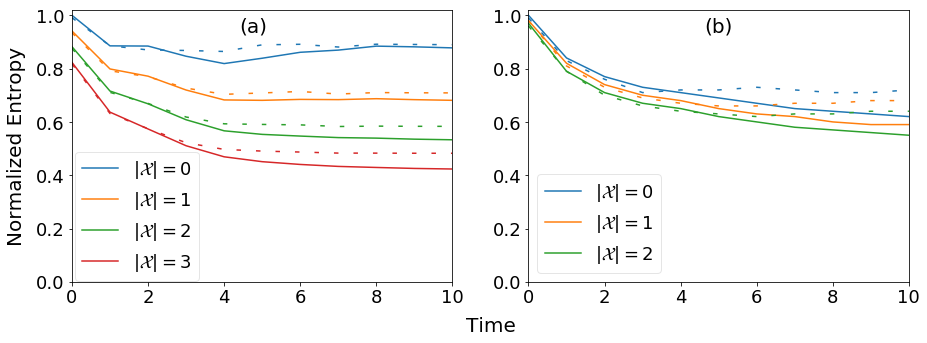

In [151]:
#Drosophila
plt.figure(figsize=(15,5))
#fig=plt.figure
plt.subplot(121)
iterations,length=11,1
xvalues=range(iterations)
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#size=0
plt.plot(xvalues,[np.mean([seed_entropy2[seed][t] for seed in seed_entropy0]) for t in xvalues],label=r'$|\mathcal{X}|=0$')
plt.plot(xvalues,[np.mean([seed_entropy0[seed][t] for seed in seed_entropy0]) for t in xvalues],'--',dashes=(3, 10),
             color=colors[0],markersize=10)
#size=1
plt.plot(xvalues,[np.mean([seed_entropy2[seed][t] for seed in seed_entropy1]) for t in xvalues],label=r'$|\mathcal{X}|=1$')
plt.plot(xvalues,[np.mean([seed_entropy1[seed][t] for seed in seed_entropy1]) for t in xvalues],'--',dashes=(3, 10),
             color=colors[1],markersize=10)      
#size=2
plt.plot(xvalues,[np.mean([seed_entropy4[seed][t] for seed in seed_entropy3]) for t in xvalues],label=r'$|\mathcal{X}|=2$')
plt.plot(xvalues,[np.mean([seed_entropy3[seed][t] for seed in seed_entropy3]) for t in xvalues],'--',dashes=(3, 10),
             color=colors[2],markersize=10)
#size=3
plt.plot(xvalues,[np.mean([seed_entropy6[seed][t] for seed in seed_entropy5]) for t in xvalues],label=r'$|\mathcal{X}|=3$')
plt.plot(xvalues,[np.mean([seed_entropy5[seed][t] for seed in seed_entropy5]) for t in xvalues],'--',dashes=(3, 10),
             color=colors[3],markersize=10)
#plt.title('Performance by degree')
plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0,1.02])
plt.xlim([0,10])
plt.legend(loc='lower left',fontsize=18,framealpha=0.5,bbox_to_anchor=(-0.015, -0.03))

#Leukemia
plt.subplot(122)
for k in range(3):
    plt.plot(xvalues,eval('lentropy'+str(k)),label=r'$|\mathcal{X}|='+str(k)+'$')
    plt.plot(xvalues,eval('lsim'+str(k)),'--',dashes=(3, 10),color=colors[k],markersize=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0,1.02])
plt.xlim([0,10])
plt.legend(loc='lower left',fontsize=18,framealpha=0.5) #,bbox_to_anchor=(-0.015, -0.03)

plt.figtext(0.28, 0.82, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.71, 0.82, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

#### Figure 5

In [12]:
#Drosophila attractor simulation entropies
a0=[0.868455697904,0.518842797065,0.176096983125,0.0,0,0,0,0,0,0,0]
a1=[0.868455697904,0.518842797065,0.176096983125,0.0,0,0,0,0,0,0,0]
a2=[0.868455697904,0.527236912386,0.0575661173388,0.0,0,0,0,0,0,0,0]
a3=[0.868455697904,0.397671914472,0.232449221203,0.0574412040446,0.0,0,0,0,0,0,0] #label 4
a4=[0.868455697904,0.538263169476,0.283918032089,0.226572218813,0.193960013602,0.152862232704,0.153021742254,0.111096862935,0.0588184052648,0.0,0]
a5=[0.868455697904,0.397671914472,0.232449221203,0.174154643381,0.0586706816805,0.0,0,0,0,0,0]
a6=[0.868455697904,0.518842797065,0.176096983125,0.0,0,0,0,0,0,0,0]
a7=[0.868455697904,0.397671914472,0.232449221203,0.174154643381,0.154523692508,0.151235697568,0.0918802330235,0.0582533541442,0.0,0,0]
a8=[0.868455697904,0.538263169476,0.274748139745,0.216711468684,0.212127278766,0.157666521234,0.149526659165,0.106944876011,0.0588176563064,0.0,0]
a9=[0.868455697904,0.538263169476,0.274748139745,0.223046569844,0.190381172224,0.149263323655,0.105539528543,0.0586429240047,0.0,0,0]
random_selection=[0.88033439727280549,0.71547521879168885,0.59221683361830468,0.47743704460946873,0.40046065460869246,0.35337635285912106,0.29919824911561149,0.22773605669967212,0.18455349804156307,0.14592900054900379,0.11728803073319512]

#Yeast
ygreedy=[0.6719007542905882,0.17605118616050727,0.007480228501862943,0,0,0,0,0,0,0,0]
ysim=[0.6724123633922702,0.6372097664954347,0.22059532258448575,0.20882359968396783,0,0,0,0,0,0,0]
y0=[0.6724123633922702, 0.6372097664954347, 0.571397463328433, 0.28760636667302925, 0.18590709012867465, 0.0390829661324401, 0.0, 0.0, 0.0, 0.0, 0.0]
y1=[0.6724123633922702, 0.35085576757830844, 0.37212179562405506, 0.4097331803783812, 0.2690950905482233, 0.10993215578858989, 0.027690552518467925, 0.0, 0.0, 0.0, 0.0]
y2=[0.6724123633922702, 0.35085576757830844, 0.37212179562405506, 0.4097331803783812, 0.2690950905482233, 0.10993215578858989, 0.0, 0.0, 0.0, 0.0, 0.0]
y3=[0.6724123633922702, 0.7755680053272781, 0.35764168180003314, 0.20682158304190312, 0.06315356330119609, 0.03332817061991899, 0.012174520843344706, 0.01713270901542358, 0.028107505551417823, 0.0, 0.0]
y4=[0.6724123633922702, 0.35085576757830844, 0.37212179562405506, 0.29573490427379623, 0.16827566051440968, 0.028429491095431355, 0.0, 0.0, 0.0, 0.0, 0.0]
y5=[0.6724123633922702, 0.7755680053272781, 0.35764168180003314, 0.20682158304190312, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
y6=[0.6724123633922702, 0.6372097664954347, 0.5793570838502057, 0.33782690098029605, 0.2850111480730952, 0.20144982049918111, 0.07065514543050437, 0.0, 0.0, 0.0, 0.0]
y7=[0.6724123633922702, 0.35085576757830844, 0.37212179562405506, 0.4097331803783812, 0.2690950905482233, 0.24040473813354027, 0.28658814257740833, 0.27397625713028945, 0.1805100576764885, 0.0676065103715944, 0.0]
y8=[0.6724123633922702, 0.6372097664954347, 0.5793570838502057, 0.33782690098029605, 0.2850111480730952, 0.20144982049918111, 0.07065514543050437, 0.0, 0.0, 0.0, 0.0]
y9=[0.6724123633922702, 0.7755680053272781, 0.35764168180003314, 0.20682158304190312, 0.06315356330119609, 0.034484737525302823, 0.011253016900177298, 0.01713270901542358, 0.028107505551417823, 0.0, 0.0]
y10=[0.6724123633922702, 0.6372097664954347, 0.571397463328433, 0.28760636667302925, 0.18590709012867465, 0.0390829661324401, 0.0, 0.0, 0.0, 0.0, 0.0]
yrandom=[0.6724123633922692,0.5571141414741188,0.4614853497771497,0.3872605782407361,0.31590583770354114,0.2592009752820338,0.2070882716860438,0.15225319872623794,0.11061027237748287,0.06785770246906146,0.040565789059344944]

#Drosophila Parasegment, T=10
pgreedy=[0.91003133888,0.641910503979,0.35046661257,0.204541883614,0.0663307220324,0.0315922853075,0.0122406021238,0,0,0,0]
psim=[0.9147661386917189,0.6786356980571463,0.5247624380324175,0.32701636429371167,0.12195103417597772,0.056113404901707756,0.012791091054141187,0.0,0,0,0]
wildtype=[0.9147661386917189, 0.6786356980571463, 0.511705214304021, 0.21284706310897883, 0.1258524956977322, 0.06618496359918721, 0.025343982193193348, 0.009765131656954744, 0.004039656794795561, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
wildvar=[0.9147661386917189, 0.6786356980571463, 0.511705214304021, 0.21284706310897883, 0.1258524956977322, 0.06618496359918721, 0.025343982193193348, 0.009765131656954744, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ectopic=[0.9147661386917189, 0.6928113258131485, 0.4970608079776368, 0.2194129961603001, 0.1207889960584624, 0.06905166711787876, 0.02300776913728967, 0.002693104529863707, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ectopvar=[0.9147661386917189, 0.6928113258131485, 0.4970608079776368, 0.2194129961603001, 0.1207889960584624, 0.06905166711787876, 0.02300776913728967, 0.002693104529863707, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
broad=[0.9147661386917189, 0.6786356980571463, 0.490137333099128, 0.3136530458545012, 0.09816653344996704, 0.049826706893927555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
noseg=[0.9147661386917189, 0.700519594521998, 0.20028562803560407, 0.14720833013312357, 0.09854654455706013, 0.07116967852858491, 0.04798661629066235, 0.04602103408300668, 0.024572438943292047, 0.008079313589591122, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
prandom=[0.9147661386917182,0.8404686516170032,0.7688138236372337,0.6990185776941072,0.6429725510246423,0.5983701995148827,0.5434919281841787,0.49973983154882357,0.45486285506151836,0.4137925771200102,0.37167859206978343]

#Drosophila Parasegment, T=20
#pgreedy=[0.8978782605273133,0.599433598266786,0.07308950430620022,0.054109206268261274,0.03581738170830054,0.017270499009500232,0.0002998079653382075,0.0,0,0,0]
#psim=[0.8997596757643345,0.6940359992761462,0.5253494902358269,0.4158803363886753,0.14465123507128483,0.10540917075043658,0.06778050968277902,0.0,0,0,0]
#prandom=[0.8997596757643335,0.8396617639941435,0.7738667829137585,0.700910829790152,0.660597842012118,0.614072366357648,0.5687733932874405,0.52659255626584,0.4792155442616093,0.4368620386850587,0.4012152136380689]
         
#Leukemia
lgreedy=[0.623129765665,0.441504828332,0.267964325025,0.102139374515,0.0550499286193,0.0378169769169,0.0208207112676,0.00415404460092,0.0,0.0,0.0]
lsim=[0.71545715030685553, 0.52975581916998449, 0.36185879113073322, 0.11640648246931382, 0.072621010933936664, 0.053796977800235742, 0.022124081985907939, 0.0067029865033712147, 0.0, 0.0, 0.0]
lrandom=[0.71545715030685497,0.68077598387744398,0.64187152081305077,0.59962166272064887,0.56059453237432111,0.52818106435126377,0.49159153928578697,0.46531942800712955,0.42932728578237189,0.40881322150657806,0.39179975005659906]

Text(0.61,0.425,'(d)')

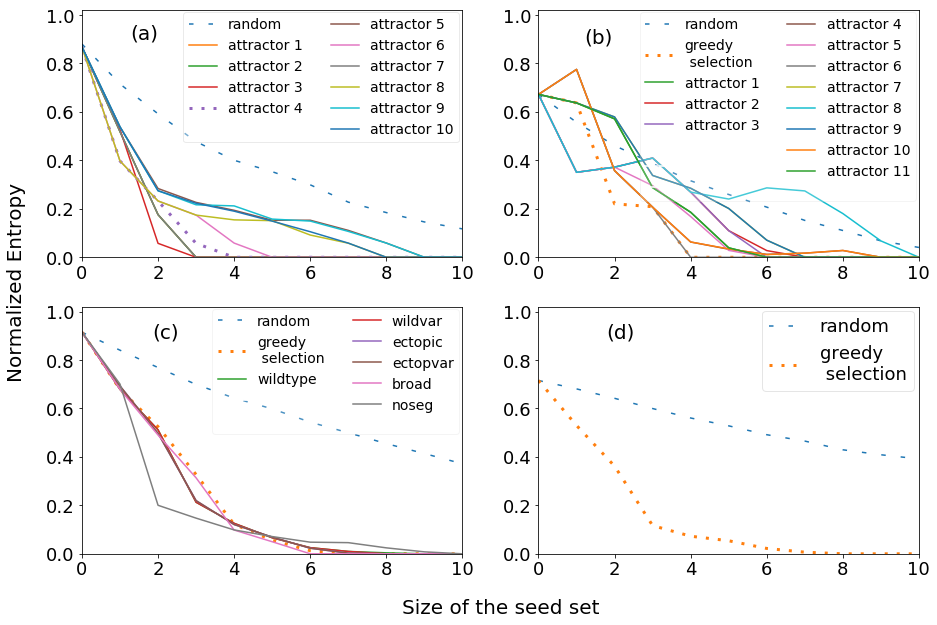

In [13]:
#Drosophila attractors
plt.figure(figsize=(15,10))
plt.subplot(221)
iterations=11
xvalues=range(iterations)
plt.plot(xvalues,random_selection,'--',dashes=(3, 10),label='random')
for i in range(11):
    if i<3:
        plt.plot(xvalues,eval('a'+str(i)),label='attractor '+str(i+1))
    if i==3: #unconstrained search/attractor 4
        plt.plot(xvalues,eval('a'+str(i)),'-.',dashes=(1, 3),linewidth=3,label='attractor '+str(i+1))
    if i==4: #added to fix legend
        plt.plot([],[],label='.',color='white') #labelcolor='white' works in matplotlib 3.3
    if i>4:
        plt.plot(xvalues,eval('a'+str(i-1)),label='attractor '+str(i))
plt.xticks(fontsize=18)
#plt.xticks([0,2,4,6,8,10],[],fontsize=18) #remove labels
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
leg=plt.legend(loc='upper right',fontsize=14,framealpha=0.4,ncol=2,bbox_to_anchor=(1.01, 1.02))
for i,text in enumerate(leg.get_texts()): #labelcolor workaround for legend
    if i==5:
        plt.setp(text, color = 'w')

#Yeast
plt.subplot(222)
plt.plot(xvalues,yrandom,'--',dashes=(3, 10),label='random')
plt.plot(xvalues,ysim,'-.',dashes=(1, 3),linewidth=3,label='greedy\n selection')
for i in range(14):
    if i<3:
        plt.plot(xvalues,eval('y'+str(i)),label='attractor '+str(i+1))
    if i==3 or i==4 or i==5: #added to fix legend
        plt.plot([],[],label='.',color='white')
    if i>5:
        plt.plot(xvalues,eval('y'+str(i-3)),label='attractor '+str(i-2))
plt.xticks(fontsize=18)
#plt.xticks([0,2,4,6,8,10],[],fontsize=18) #remove labels
plt.yticks(fontsize=18)
#plt.yticks([0,2,4,6,8,10],[],fontsize=18) #remove labels
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
leg=plt.legend(loc='upper right',fontsize=14,framealpha=0.2,ncol=2,bbox_to_anchor=(1.01, 1.02))
for i,text in enumerate(leg.get_texts()): #labelcolor workaround for legend
    if i==5 or i==6 or i==7:
        plt.setp(text, color = 'w')

#Drosophila Parasegment
plt.subplot(223)
plt.ylabel("Normalized Entropy",fontsize=20,position=(1,1.1),labelpad=20)
plt.xlabel('Size of the seed set',fontsize=20,position=(1.1,1),labelpad=20)
plt.plot(xvalues,prandom,'--',dashes=(3, 10),label='random')
plt.plot(xvalues,psim,'-.',dashes=(1, 3),linewidth=3,label='greedy\n selection')
dpattractors=['wildtype','wildvar','ectopic','ectopvar','broad','noseg']
for i in range(8):
    if not i:
        plt.plot(xvalues,eval(dpattractors[i])[:iterations],label=dpattractors[i])
    if i==1 or i==2: #added to fix legend
        plt.plot([],[],label='.',color='white')
    if i>2:
        plt.plot(xvalues,eval(dpattractors[i-2])[:iterations],label=dpattractors[i-2])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
leg=plt.legend(loc='upper right',fontsize=14,framealpha=0.2,ncol=2,bbox_to_anchor=(1.01, 1.02))
for i,text in enumerate(leg.get_texts()): #labelcolor workaround for legend
    if i==3 or i==4:
        plt.setp(text, color = 'w')

#Leukemia
plt.subplot(224)
plt.plot(xvalues,lrandom,'--',dashes=(3, 10),label='random')
plt.plot(xvalues,lsim,'-.',dashes=(1, 3),linewidth=3,label='greedy\n selection')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yticks([0,2,4,6,8,10],[],fontsize=18) #remove labels
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.legend(loc='upper right',fontsize=18,framealpha=0.5,bbox_to_anchor=(1.01, 1.02))

plt.figtext(0.17, 0.84, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.59, 0.835, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.19, 0.425, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.61, 0.425, "(d)", wrap=True, horizontalalignment='left', fontsize=20)

#### Figure 6-10

In [55]:
#RBNs
drivers_by_n={2: {10: {'resolved': 6.9, 'size': 2.0, 'time': 0.48640005588531493},
  20: {'resolved': 14.9, 'size': 4.3, 'time': 4.195599985122681},
  30: {'resolved': 21.1, 'size': 5.5, 'time': 12.41659996509552},
  40: {'resolved': 28.6, 'size': 7.6, 'time': 29.729500007629394},
  50: {'resolved': 33.5, 'size': 8.8, 'time': 51.62620000839233},
  60: {'resolved': 36.4, 'size': 9.8, 'time': 84.1125},
  70: {'resolved': 49.7, 'size': 13.3, 'time': 157.4107999563217},
  80: {'resolved': 54.2, 'size': 15.0, 'time': 229.58289997577668},
 90: {'resolved': 61.0, 'size': 15.2, 'time': 279.3986000061035},
 100: {'resolved': 62.5, 'size': 18.9, 'time': 423.22820003032683}},
3: {10: {'resolved': 9.7, 'size': 2.6, 'time': 0.7258000135421753},
  20: {'resolved': 17.2, 'size': 5.2, 'time': 5.456900024414063},
  30: {'resolved': 28.1, 'size': 7.3, 'time': 16.93459997177124},
  40: {'resolved': 36.1, 'size': 10.2, 'time': 41.94920003414154},
  50: {'resolved': 45.1, 'size': 13.5, 'time': 84.15349996089935},
  60: {'resolved': 52.3, 'size': 15.3, 'time': 142.3023999929428},
  70: {'resolved': 61.3, 'size': 17.6, 'time': 219.80340003967285},
  80: {'resolved': 67.8, 'size': 19.7, 'time': 321.7},
  90: {'resolved': 82.2, 'size': 24.4, 'time': 491.98109996318817},
  100: {'resolved': 87.2, 'size': 26.0, 'time': 664.6181999921798}},
4: {10: {'resolved': 7.8, 'size': 3.4, 'time': 0.8815000534057618},
  20: {'resolved': 14.7, 'size': 6.6, 'time': 6.716700005531311},
  30: {'resolved': 25.2, 'size': 10.3, 'time': 24.504200053215026},
  40: {'resolved': 35.0, 'size': 13.5, 'time': 55.25819997787475},
  50: {'resolved': 36.3, 'size': 16.7, 'time': 111.00950000286102},
  60: {'resolved': 50.5, 'size': 19.8, 'time': 185.90720002651216},
  70: {'resolved': 50.1, 'size': 23.1, 'time': 293.58609998226166},
  80: {'resolved': 63.1, 'size': 26.9, 'time': 449.7540999650955},
  90: {'resolved': 69.0, 'size': 30.8, 'time': 644.0180000066757},
  100: {'resolved': 74.0, 'size': 33.3, 'time': 870.2704999685287}},
5: {10: {'resolved': 8.1, 'size': 3.9, 'time': 1.1397000074386596},
  20: {'resolved': 17.6, 'size': 8.2, 'time': 9.332299971580506},
  30: {'resolved': 23.5, 'size': 11.7, 'time': 30.178299999237062},
  40: {'resolved': 29.7, 'size': 15.8, 'time': 73.03140001296997},
  50: {'resolved': 36.8, 'size': 19.9, 'time': 143.53889999389648},
  60: {'resolved': 47.5, 'size': 24.3, 'time': 244.39649999141693},
  70: {'resolved': 49.4, 'size': 27.2, 'time': 379.15459995269777},
  80: {'resolved': 62.9, 'size': 31.9, 'time': 580.4942000389099},
  90: {'resolved': 67.3, 'size': 36.0, 'time': 822.3061000108719},
  100: {'resolved': 74.0, 'size': 39.7, 'time': 1134.5489999771119}}}
drivers_by_bias={2.0: [0.0, 0.56, 1.67, 2.77, 3.48, 3.71], 3.0: [0.0, 0.77, 2.3, 3.58, 4.83, 5.18]}
drivers_k3_n50=[0.0, 2.02, 5.81, 9.43, 11.99, 13.2]

In [56]:
#Cell Collective; READ in from json and get rid of unicode representations
cell_stats=json.load(open( "cell_collective_statistics.json" ))
cell_stats={str(n): {str(key): cell_stats[n][key] for key in cell_stats[n]} for n in cell_stats}
cell_drivers=json.load(open( "cell_collective_drivers.json" ))
cell_drivers={str(n): {str(key): cell_drivers[n][key] for key in cell_drivers[n]} for n in cell_drivers}
cell_cana=json.load(open( "cell_collective_cana.json" ))
cell_cana={str(n): {str(key): cell_cana[n][key] for key in cell_cana[n]} for n in cell_cana}
len(cell_cana)

62

(-0.09752584884528324, 0.40844151295918874)
(0.03305624663265941, 0.7797876005963578)
(0.25566442289716224, 0.027910332556621627)


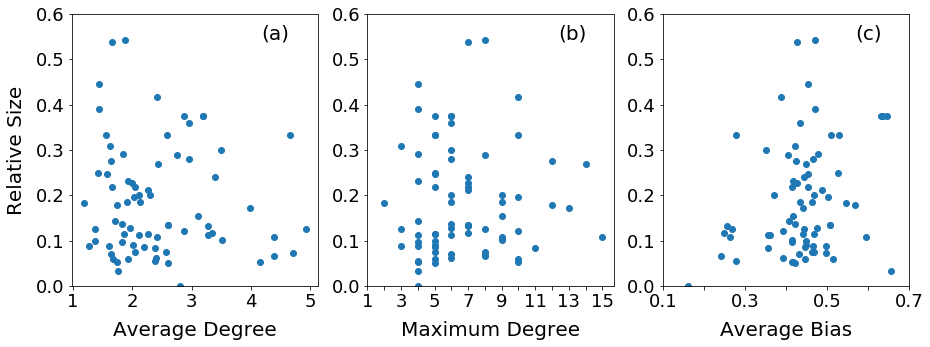

In [57]:
#Cell Collective drivers by stats
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,5))
labels=['Average Degree', 'Maximum Degree', 'Average Bias']
plt.ylabel("Relative Size",fontsize=20,labelpad=10)
for i,stat in enumerate(['avg_k','max_k','avg_bias']):
    plt.subplot(eval('13'+str(i+1)))
    subnetworks=[n for n in cell_stats if cell_stats[n][stat]]
    xvalues=[cell_stats[n][stat] for n in subnetworks]
    yvalues=[cell_drivers[n]['size']/float(cell_stats[n]['size']) for n in subnetworks]
    plt.scatter(xvalues,yvalues)
    print pearsonr(xvalues,yvalues)
    plt.xlabel(labels[i],fontsize=20,labelpad=10)
    if i==0: plt.ylabel("Relative Size",fontsize=20,labelpad=10)
    plt.ylim([0,.6])
    if i==1: plt.xticks(range(1,16),[1,'',3,'',5,'',7,'',9,'',11,'',13,'',15,''])
    if i==2: plt.xticks([.1,.2,.3,.4,.5,.6,.7],[.1,'',.3,'',.5,'',.7]) #[.1,'',.3,'',.5,'',.7]
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    #print zip(xvalues,yvalues)
plt.figtext(0.30, 0.81, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.575, 0.81, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.85, 0.81, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.show()

#Cell Collective drivers by network size, stat-based coloring
#subnetworks=[n for n in cell_stats if cell_stats[n]['avg_bias']] #if cell_stats[n]['max_k']>=9
#labels=[int(round(cell_stats[n]['max_k'])) for n in subnetworks] #SPECIFY STAT
#labels=[int(round(cell_stats[n]['avg_bias'],1)*10) for n in subnetworks] #for avg_bias
#colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#lcolors=[colors[x-min(labels)] for x in labels]
#legend_labels=['k='+str(l) for l in set(sorted(labels))]
#legend_labels=[l/10.0 for l in set(sorted(labels))] #for avg_bias
#legend_pts=[Line2D([], [], marker='o', color='w', label=col, markerfacecolor=col, markersize=10) for col in colors if col in lcolors]
#graph cell collective values
#xvalues=[cell_stats[n]['size'] for n in subnetworks]
#yvalues=[cell_drivers[n]['size']/float(cell_stats[n]['size']) for n in subnetworks]
#plt.scatter(xvalues,yvalues,color=lcolors)
#plt.ylim([0,.6])
#plt.xlim([0,200]) #one outlier of size 321
#plt.xlabel('Network Size',fontsize=20,labelpad=10)
#plt.xticks([0,25,50,75,100,125,150,175,200],[0,'',50,'',100,'',150,'',200],fontsize=18)
#plt.yticks(fontsize=18)
#plt.legend(legend_pts,legend_labels,loc='upper right',fontsize=16,framealpha=0.5,)

(0.2049083481528339, 0.11012807672314726)
(-0.22024540488070987, 0.08541194982040706)


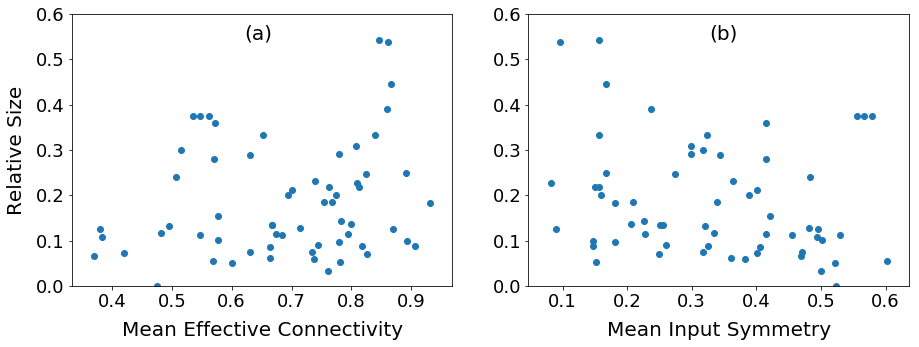

In [59]:
#Cell Collective drivers by canalization stats
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,5))
labels=['Mean Effective Connectivity', 'Mean Input Symmetry']
plt.ylabel("Relative Size",fontsize=20,labelpad=10)
for i,stat in enumerate(['avg_eff','avg_sym']):
    plt.subplot(eval('12'+str(i+1)))
    subnetworks=[n for n in cell_cana if cell_cana[n][stat]]
    xvalues=[cell_cana[n][stat] for n in subnetworks]
    yvalues=[cell_drivers[n]['size']/float(cell_stats[n]['size']) for n in subnetworks]
    plt.scatter(xvalues,yvalues)
    print pearsonr(xvalues,yvalues)
    plt.xlabel(labels[i],fontsize=20,labelpad=10)
    if i==0: plt.ylabel("Relative Size",fontsize=20,labelpad=10)
    plt.ylim([0,.6])
    if i==10: plt.xticks(range(1,16),[1,'',3,'',5,'',7,'',9,'',11,'',13,'',15,''])
    if i==2: plt.xticks([.1,.2,.3,.4,.5,.6,.7],[.1,'',.3,'',.5,'',.7]) #[.1,'',.3,'',.5,'',.7]
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    #print zip(xvalues,yvalues)
plt.figtext(0.285, 0.81, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.715, 0.81, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.show()

Text(0.705,0.81,'(b)')

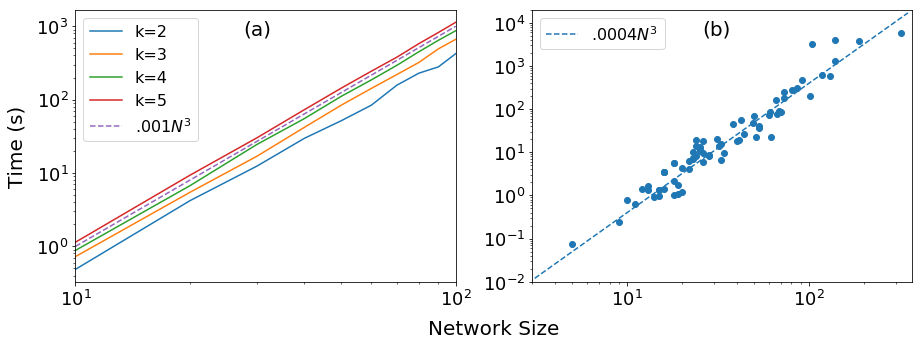

In [68]:
#RBNs, time to find drivers
plt.figure(figsize=(15,5))
plt.subplot(121)
base=10 #base of logarithm for log plots
xvalues=[10,20,30,40,50,60,70,80,90,100]
xlvalues=[math.log(x,base) for x in xvalues] #log-log plot
for i,key in enumerate(drivers_by_n):
    plt.plot(xvalues,[drivers_by_n[key][n]['time'] for n in xvalues],label='k='+str(key)) #,color=colors[i]
    #plt.plot(xlvalues,[math.log(drivers_by_n[key][n]['time'],base) for n in xvalues],label='k='+str(key)) #log-log plot
plt.plot(xvalues,[.001*x**3 for x in xvalues],'--',label=r'$.001N^3$') #cubic line; math.log() or /n**3 ?
#plt.plot(xlvalues,[math.log(.001*x**3,base) for x in xvalues],'--',label=r'$.001N^3$') #log-log plot
plt.ylabel("Time (s)",fontsize=20,labelpad=10)
plt.xlabel('Network Size',fontsize=20,labelpad=10,position=(1.1,1))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlim([10,100.1]) #gets rid of smaller labeling for log-log plots
#plt.ylim([0,1200]) #[0,1200] for cubic
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.legend(loc='upper left',fontsize=16,framealpha=0.8)#,bbox_to_anchor=(-0.01, -0.04))

#Cell Collective, time to find drivers
plt.subplot(122)
subnetworks=[n for n in cell_drivers if cell_drivers[n]['time']] #if cell_stats[n.name]['max_k']>=9
xvalues=[cell_stats[n]['size'] for n in subnetworks] #or math.log
yvalues=[cell_drivers[n]['time'] for n in subnetworks] #/float(cell_stats[n]['size'])**3
#xvalues=[math.log(cell_stats[n]['size'],base) for n in subnetworks] #log-log plot
#yvalues=[math.log(cell_drivers[n]['time'],base) for n in subnetworks] #log-log plot
plt.scatter(xvalues,yvalues)
plt.plot(range(350),[.0004*x**3 for x in range(350)],'--',label=r'$.0004N^3$') #cubic line; math.log() or /n**3 ?
#plt.plot([math.log(x,base) for x in range(1,350)],[math.log(.0004*x**3,base) for x in range(1,350)],'--',label=r'$.0004N^3$',color='#9467bd') #log-log plot
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
#plt.xlim([0,350])
#plt.ylim([0,6500]) #[0,6500] for cubic
plt.xlim([3,370]) #log-log
plt.ylim([.01,20000]) #log-log
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.legend(loc='upper left',fontsize=16,framealpha=0.8)
plt.figtext(0.28, 0.81, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.705, 0.81, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

Text(0.715,0.81,'(b)')

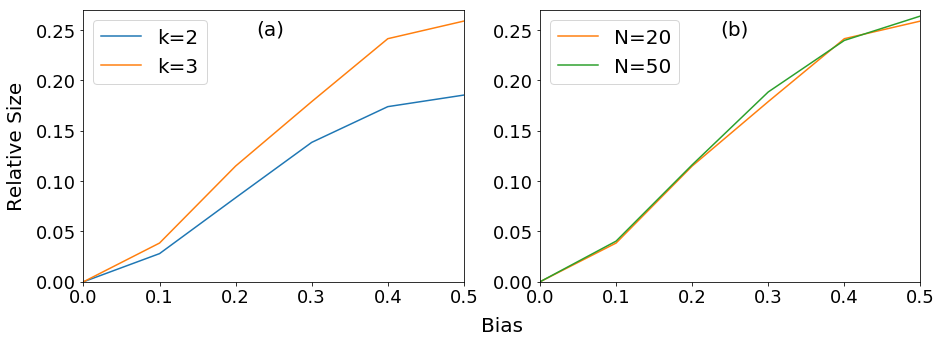

In [303]:
#RBNs, Drivers over k
plt.figure(figsize=(15,5))
plt.subplot(121)
biases=[0,.1,.2,.3,.4,.5]
n=20
for i,key in enumerate(drivers_by_bias):
    plt.plot(biases,[s/n for s in drivers_by_bias[key]],label='k='+str(int(key)))
plt.xlabel('Bias',fontsize=20,labelpad=10,position=(1.1,1))
plt.ylabel('Relative Size',fontsize=20,labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,0.5])
plt.ylim([0,0.27])
plt.legend(loc='upper left',fontsize=20,framealpha=0.8)

#RBNs, Drivers over n
plt.subplot(122)
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
k=3
plt.plot(biases,[s/20 for s in drivers_by_bias[k]],label='N=20',color=colors[1]) #match color with previous plot
plt.plot(biases,[s/50 for s in drivers_k3_n50],label='N=50',color=colors[2])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,0.5])
plt.ylim([0,0.27])
plt.legend(loc='upper left',fontsize=20,framealpha=0.8)
plt.figtext(0.285, 0.81, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.715, 0.81, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

In [50]:
#CD4 T Cell Signaling
entropies=json.load(open( "CD4_entropies_s1_sample10.json" ))
seed_entropy={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
sunit_map=json.load(open( "CD4_sunit_map_s1_sample10.json" ))
sunit_map={int(seed): str(sunit_map[seed]) for seed in sunit_map}
translator=json.load(open( "CD4_translator_s1_sample10.json" ))
translator={str(seed): translator[seed] for seed in translator}
sorted_entropies=sorted(seed_entropy,key=lambda x: seed_entropy[x][20])
#HH-Pathway Drosophila
entropies=json.load(open( "HH-Pathway_entropies_s1.json" ))
seed_entropy2={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
sunit_map2=json.load(open( "HH-Pathway_sunit_map_s1.json" ))
sunit_map2={int(seed): str(sunit_map2[seed]) for seed in sunit_map2}
translator2=json.load(open( "HH-Pathway_translator_s1.json" ))
translator2={str(seed): translator2[seed] for seed in translator2}
sorted_entropies2=sorted(seed_entropy2,key=lambda x: seed_entropy2[x][20])

Text(0.715,0.81,'(b)')

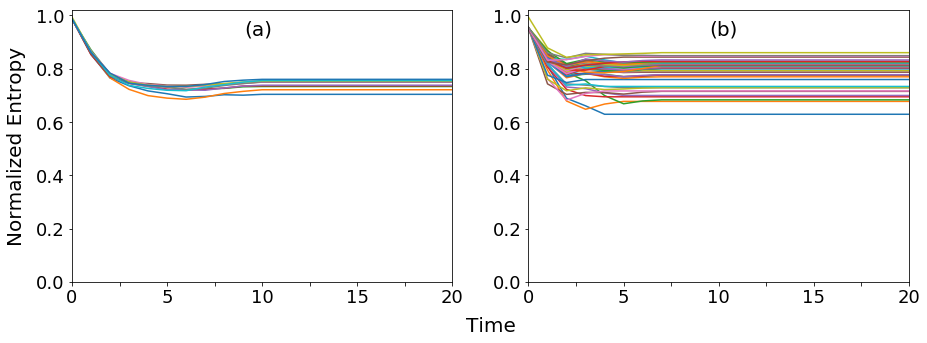

In [67]:
#CD4 T Cell Signaling
plt.figure(figsize=(15,5))
plt.subplot(121)
iterations,length=21,1
#print 'Lowest:',sorted_entropies[0],[round(seed_entropy[sorted_entropies[0]][t],2) for t in seed_entropy[sorted_entropies[0]]],
#print to_list(sorted_entropies[0],sunit_map,translator)
#print 'Highest:',sorted_entropies[-1],[round(seed_entropy[sorted_entropies[-1]][t],2) for t in seed_entropy[sorted_entropies[-1]]],
#print to_list(sorted_entropies[-1],sunit_map,translator)
xvalues=range(iterations)
for index,seed in enumerate(sorted_entropies):
    if index==0:
        plt.plot(xvalues,[seed_entropy[seed][t] for t in xvalues],label=str(to_list(seed,sunit_map,translator))+', '+str(index))
    #elif index%2==0: continue
    else:
        plt.plot(xvalues,[seed_entropy[seed][t] for t in xvalues])
#plt.legend(loc='upper right',fontsize=20,framealpha=0.8)
plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
plt.xticks([0,2.5,5,7.5,10,12.5,15,17.5,20],[0,'',5,'',10,'',15,'',20],fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])

#HH-Pathway Drosophila
plt.subplot(122)
#print 'Lowest:',sorted_entropies2[0],[round(seed_entropy2[sorted_entropies2[0]][t],2) for t in seed_entropy2[sorted_entropies2[0]]],
#print to_list(sorted_entropies2[0],sunit_map2,translator2)
#print 'Highest:',sorted_entropies2[-1],[round(seed_entropy2[sorted_entropies2[-1]][t],2) for t in seed_entropy2[sorted_entropies2[-1]]],
#print to_list(sorted_entropies2[-1],sunit_map2,translator2)
xvalues=range(iterations)
for index,seed in enumerate(sorted_entropies2):
    if index==0:
        plt.plot(xvalues,[seed_entropy2[seed][t] for t in xvalues],label=str(to_list(seed,sunit_map2,translator2))+', '+str(index))
    #elif index%2==0: continue
    else:
        plt.plot(xvalues,[seed_entropy2[seed][t] for t in xvalues])
#plt.legend(loc='upper right',fontsize=20,framealpha=0.8)
plt.xticks([0,2.5,5,7.5,10,12.5,15,17.5,20],[0,'',5,'',10,'',15,'',20],fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,iterations-1])
plt.ylim([0,1.02])
plt.figtext(0.285, 0.81, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.715, 0.81, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

#### Rebuttal Figures

In [3]:
#drosophila, different update schedules
derrors=[0.012, 0.012, 0.012, 0.021, 0.027, 0.029, 0.028, 0.033, 0.032, 0.032, 0.032, 0.034, 0.034, 0.034, 0.034, 0.034] #syn
derrors1=[0.012, 0.012, 0.019, 0.025, 0.03, 0.032, 0.032, 0.032, 0.033, 0.033, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032] #det asyn
derrors2=[0.012, 0.021, 0.023, 0.026, 0.027, 0.03, 0.031, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032] #sto w/o rep
derrors3=[0.012, 0.028, 0.027, 0.026, 0.028, 0.028, 0.028, 0.029, 0.029, 0.03, 0.03, 0.031, 0.031, 0.031, 0.032, 0.032] #sto w rep

#yeast cell cycle, different update schedules
yerrors=[0.016, 0.013, 0.013, 0.028, 0.043, 0.052, 0.062, 0.073, 0.077, 0.078, 0.085, 0.091, 0.099, 0.103, 0.1, 0.092] #syn
yerrors1=[0.014, 0.02, 0.037, 0.052, 0.062, 0.061, 0.058, 0.059, 0.06, 0.064, 0.068, 0.07, 0.068, 0.066, 0.067, 0.067] #det asyn
yerrors2=[0.014, 0.026, 0.038, 0.052, 0.06, 0.058, 0.054, 0.052, 0.054, 0.058, 0.063, 0.064, 0.06, 0.057, 0.055, 0.057] #sto w/o rep
yerrors3=[0.015, 0.03, 0.034, 0.042, 0.049, 0.055, 0.059, 0.06, 0.061, 0.06, 0.06, 0.06, 0.061, 0.063, 0.066, 0.069] #sto w rep
yerrors4=[0.017, 0.013, 0.019, 0.036, 0.052, 0.055, 0.048, 0.044, 0.049, 0.066, 0.077, 0.078, 0.067, 0.053, 0.05, 0.051] #block

In [213]:
#drosophila, removed math.sqrt
derrors=[0.002, 0.002, 0.003, 0.014, 0.018, 0.022, 0.021, 0.025, 0.022, 0.021, 0.021, 0.022, 0.023, 0.023, 0.023, 0.022] #syn
derrors1=[0.003, 0.003, 0.006, 0.011, 0.016, 0.017, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018] #det asyn
derrors2=[0.003, 0.009, 0.01, 0.011, 0.013, 0.015, 0.017, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018] #sto w/o rep
derrors3=[0.002, 0.014, 0.014, 0.013, 0.013, 0.014, 0.014, 0.015, 0.016, 0.016, 0.017, 0.017, 0.017, 0.018, 0.018, 0.018] #sto w rep

#yeast cell cycle, removed math.sqrt
yerrors=[0.003, 0.002, 0.005, 0.012, 0.024, 0.032, 0.044, 0.063, 0.064, 0.052, 0.055, 0.068, 0.095, 0.116, 0.122, 0.118]
yerrors1=[0.002, 0.006, 0.018, 0.032, 0.042, 0.04, 0.037, 0.039, 0.041, 0.044, 0.048, 0.05, 0.048, 0.047, 0.048, 0.05]
yerrors2=[0.003, 0.009, 0.018, 0.029, 0.037, 0.038, 0.032, 0.031, 0.034, 0.039, 0.045, 0.045, 0.042, 0.037, 0.035, 0.036]
yerrors3=[0.003, 0.012, 0.017, 0.025, 0.034, 0.042, 0.047, 0.049, 0.05, 0.051, 0.05, 0.049, 0.05, 0.051, 0.054, 0.056]
yerrors4=[0.001, 0.003, 0.002, 0.015, 0.031, 0.035, 0.03, 0.025, 0.028, 0.052, 0.073, 0.077, 0.058, 0.036, 0.031, 0.03]

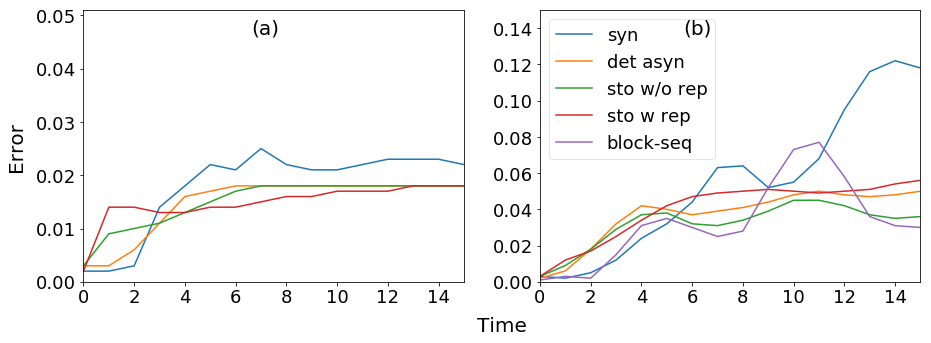

In [214]:
#Drosophila
plt.figure(figsize=(15,5))
t=16
xvalues=range(t)
#fig=plt.figure
plt.subplot(121)
plt.plot(xvalues,derrors,label='syn')
plt.plot(xvalues,derrors1,label='det asyn')
plt.plot(xvalues,derrors2,label='sto w/o rep')
plt.plot(xvalues,derrors3,label='sto w/ rep')
#plt.title('Performance by degree')
plt.ylabel("Error",fontsize=20,labelpad=10)
plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0,.051])
plt.xlim([0,t-1])
#plt.legend(loc='upper right',fontsize=20,framealpha=0.5) #bbox_to_anchor=(0.62, 0.5315)
#plt.show()

#Yeast
plt.subplot(122)
plt.plot(xvalues,yerrors,label='syn')
plt.plot(xvalues,yerrors1,label='det asyn')
plt.plot(xvalues,yerrors2,label='sto w/o rep')
plt.plot(xvalues,yerrors3,label='sto w rep')
plt.plot(xvalues,yerrors4,label='block-seq')
#plt.title('Performance by degree')
#plt.ylabel("Error",fontsize=16)
#plt.xlabel('Iterations',fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0,.15])
plt.xlim([0,t-1])
plt.legend(loc='upper left',fontsize=18,framealpha=0.5) #bbox_to_anchor=(0.62, 0.5315)
plt.figtext(0.28, 0.815, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.68, 0.815, "(b)", wrap=True, horizontalalignment='left', fontsize=20) #0.69
plt.show()

In [136]:
#drosophila entropies
with open('drosophila_avg_entropy_modules.txt') as f:
    davg_entropy_modules=eval(f.read())
with open('drosophila_driver_entropy_modules.txt') as f:
    ddriver_entropy_modules=eval(f.read())

#yeast entropies
with open('yeast_avg_entropy_modules.txt') as f:
    yavg_entropy_modules=eval(f.read())
with open('yeast_driver_entropy_modules.txt') as f:
    ydriver_entropy_modules=eval(f.read())

In [138]:
ydriver_entropy_modules['synchronous'].keys()

['(1, 5, 7, 13)',
 '(0, 4, 7, 11, 12, 14)',
 '(1, 4, 7, 10, 13)',
 '(1, 11, 13, 16)',
 '(0, 4, 7, 11, 12, 15)',
 '(0, 4, 6, 11, 14)',
 '(0, 5, 6, 12, 16)',
 '(0, 4, 6, 10, 12, 15)',
 '(0, 4, 6, 11, 15)',
 '(1, 5, 7, 10, 12, 17)',
 '(1, 5, 6, 10, 17)',
 '(0, 4, 6, 10, 12, 14, 16)']

()
(7,)
(28,)
(29,)


Text(0.71,0.435,'(d)')

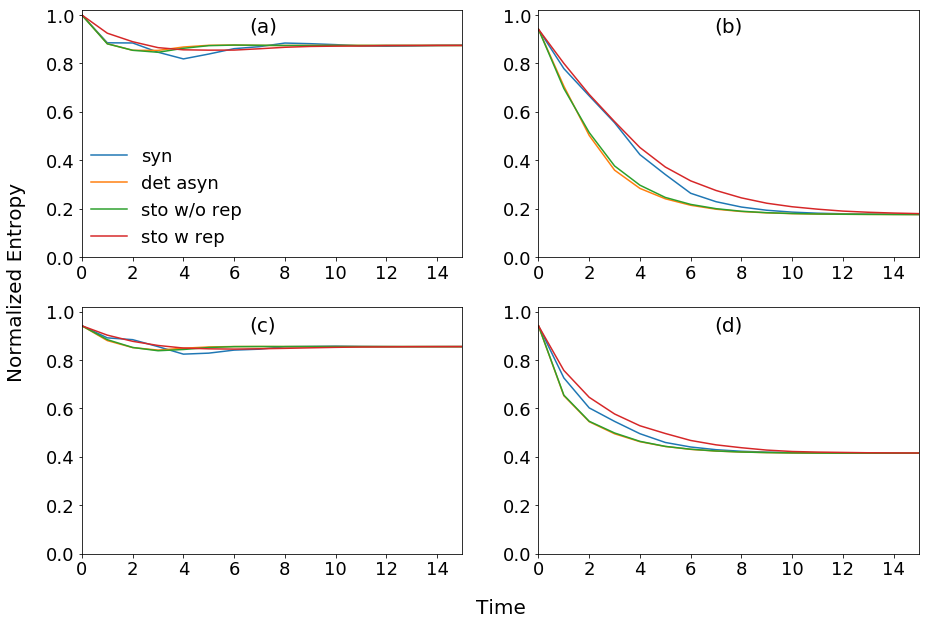

In [55]:
#Drosophila
plt.figure(figsize=(15,10))
iterations,length=16,1
xvalues=range(iterations)
#colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
keys=['synchronous','deterministic asynchronous','stochastic without replacement','stochastic with replacement','block update']
labels=['syn','det asyn','sto w/o rep','sto w rep','block-seq']
seeds=davg_entropy_modules['synchronous'].keys()
for j,seed in enumerate(seeds):
    plt.subplot(eval('22'+str(j+1)))
    print seed
    for i,key in enumerate(keys[:-1]): #no block update for drosophila
        #print seed,key
        yvalues=davg_entropy_modules[key][seeds[j]]
        #yvalues_sim=davg_entropy_sim[key][seed]
        plt.plot(xvalues,yvalues,label=labels[i])
        #plt.plot(xvalues,yvalues_sim,'--',dashes=(3, 10),color=colors[i],markersize=10)
    #plt.title("Entropy over time, s="+str(length))
    #plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
    #plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
    if j==0:
        plt.legend(loc='lower left',fontsize=18,framealpha=0.0,bbox_to_anchor=(-0.02, -0.02)) #bbox_to_anchor=(1.0, 0.95),loc='center right'
    if j==2:
        plt.ylabel("Normalized Entropy",fontsize=20,position=(1,1.1),labelpad=20)
        plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim([0,iterations-1])
    plt.ylim([0,1.02])
plt.figtext(0.28, 0.85, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.71, 0.85, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.28, 0.435, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.71, 0.435, "(d)", wrap=True, horizontalalignment='left', fontsize=20)

Text(0.71,0.435,'(d)')

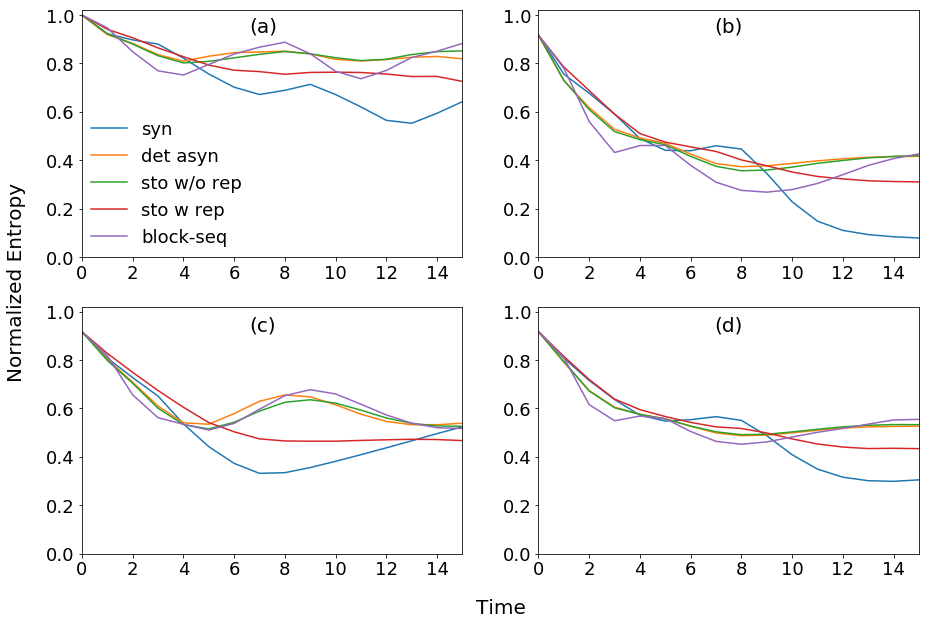

In [56]:
#Yeast
plt.figure(figsize=(15,10))
iterations,length=16,1
xvalues=range(iterations)
#colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
keys=['synchronous','deterministic asynchronous','stochastic without replacement','stochastic with replacement','block update']
labels=['syn','det asyn','sto w/o rep','sto w rep','block-seq']
seeds=['()','(1,)','(2,)','(3,)'] #yavg_entropy_modules['synchronous'].keys()
for j,seed in enumerate(seeds):
    plt.subplot(eval('22'+str(j+1)))
    for i,key in enumerate(keys):
        #print seed,key
        yvalues=yavg_entropy_modules[key][seeds[j]]
        #yvalues_sim=yavg_entropy_sim[key][seed]
        plt.plot(xvalues,yvalues,label=labels[i])
        #plt.plot(xvalues,yvalues_sim,'--',dashes=(3, 10),color=colors[i],markersize=10)
    #plt.title("Entropy over time, s="+str(length))
    #plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
    #plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
    if j==0:
        plt.legend(loc='lower left',fontsize=18,framealpha=0.0,bbox_to_anchor=(-0.02, -0.02)) #bbox_to_anchor=(1.0, 0.95),loc='center right'
    if j==2:
        plt.ylabel("Normalized Entropy",fontsize=20,position=(1,1.1),labelpad=20)
        plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim([0,iterations-1])
    plt.ylim([0,1.02])
plt.figtext(0.28, 0.85, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.71, 0.85, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.28, 0.435, "(c)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.71, 0.435, "(d)", wrap=True, horizontalalignment='left', fontsize=20)

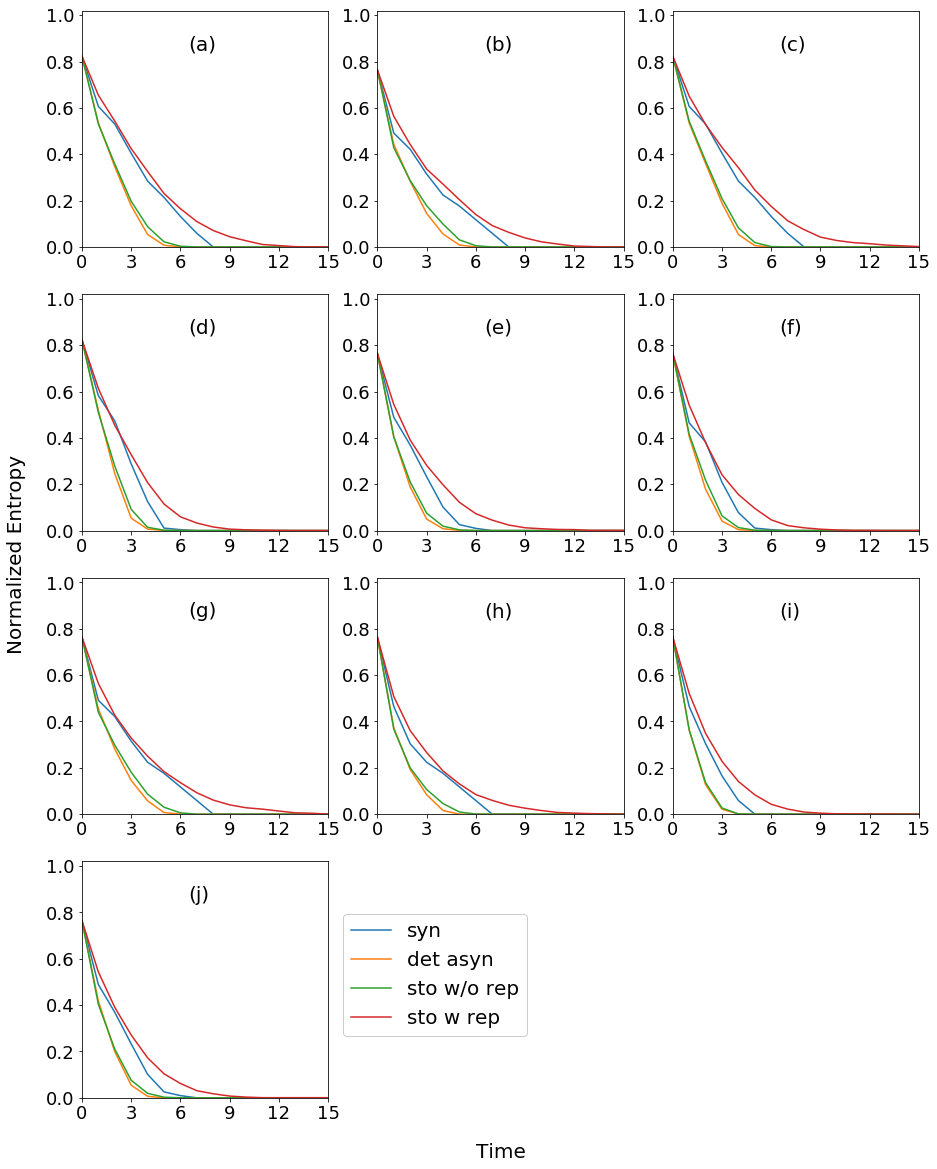

In [124]:
#Drosophila drivers
#plt.figure(figsize=(15,20))
fig, axes = plt.subplots(4,3,figsize=(15,20))
iterations,length=16,1
xvalues=range(iterations)
#colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
keys=['synchronous','deterministic asynchronous','stochastic without replacement','stochastic with replacement','block update']
labels=['syn','det asyn','sto w/o rep','sto w rep','block-seq']
seeds=['(1, 32, 31)','(0, 32, 31, 3)','(1, 33, 31)','(0, 33, 31)','(1, 33, 30, 17)','(0, 33, 30, 16)','(0, 32, 31, 2)','(0, 33, 30, 17)','(0, 32, 30, 17)','(1, 32, 30, 17)',None,None]
letters=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)']
for j,seed in enumerate(seeds):
    #plt.subplot(eval('43'+str(j+1)))
    ax=axes[j//3][j%3] #indexed row, column
    #print seed
    if not seed: #virtual plots
        ax.set_visible(False)
        continue
    for i,key in enumerate(keys[:-1]): #no block update for drosophila
        #print seed,key
        yvalues=ddriver_entropy_modules[key][seeds[j]]
        #yvalues_sim=ddriver_entropy_sim[key][seed]
        ax.plot(xvalues,yvalues,label=labels[i])
        #ax.plot(xvalues,yvalues_sim,'--',dashes=(3, 10),color=colors[i],markersize=10)
    #plt.title("Entropy over time, s="+str(length))
    #plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
    #plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
    if j==9:
        ax.legend(loc='lower left',fontsize=20,framealpha=1.0,bbox_to_anchor=(1.02, 0.22)) #bbox_to_anchor=(1.0, 0.95),loc='center right'
        ax.set_xlabel('Time',fontsize=20,position=(1.7,1),labelpad=20)
    if j==6:
        ax.set_ylabel("Normalized Entropy",fontsize=20,position=(1,1.1),labelpad=20)  
    ax.set_xticks([0,3,6,9,12,15])
    ax.set_xticklabels([0,3,6,9,12,15],fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=18)
    ax.set_xlim([0,iterations-1])
    ax.set_ylim([0,1.02])
    ax.text(6.5,.85,letters[j],fontsize=20)
#plt.figtext(0.28, 0.85, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.71, 0.85, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

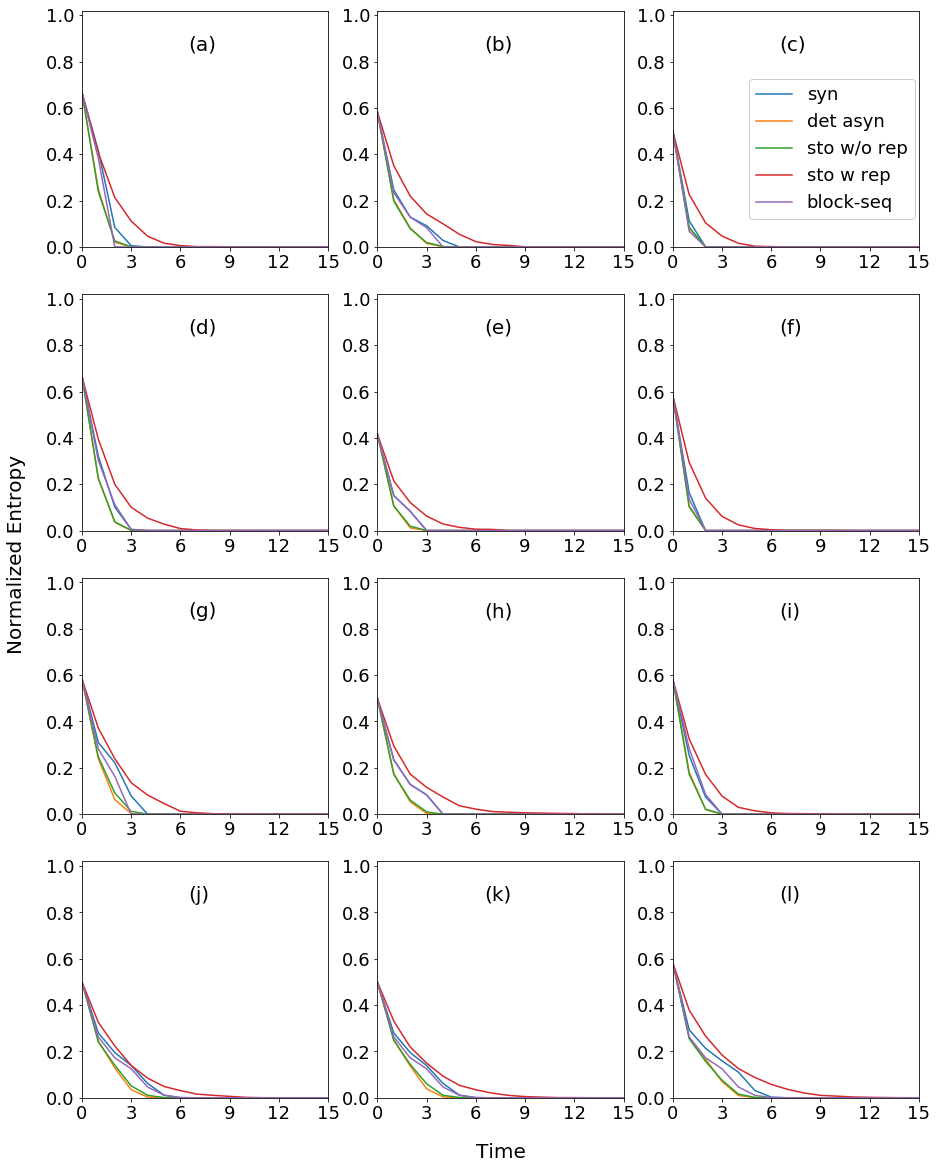

In [160]:
#Yeast drivers
#plt.figure(figsize=(15,20))
fig, axes = plt.subplots(4,3,figsize=(15,20))
iterations,length=16,1
xvalues=range(iterations)
#colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
keys=['synchronous','deterministic asynchronous','stochastic without replacement','stochastic with replacement','block update']
labels=['syn','det asyn','sto w/o rep','sto w rep','block-seq']
seeds=['(1, 11, 13, 16)','(0, 4, 6, 11, 15)','(1, 5, 7, 10, 12, 17)','(1, 5, 7, 13)','(0, 4, 6, 10, 12, 14, 16)','(1, 5, 6, 10, 17)','(0, 5, 6, 12, 16)','(0, 4, 7, 11, 12, 15)','(1, 4, 7, 10, 13)','(0, 4, 7, 11, 12, 14)','(0, 4, 6, 10, 12, 15)','(0, 4, 6, 11, 14)']
letters=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)']
for j,seed in enumerate(seeds):
    #plt.subplot(eval('43'+str(j+1)))
    ax=axes[j//3][j%3] #indexed row, column
    #print seed
    for i,key in enumerate(keys):
        #print seed,key
        yvalues=ydriver_entropy_modules[key][seeds[j]]
        #yvalues_sim=ydriver_entropy_sim[key][seed]
        ax.plot(xvalues,yvalues,label=labels[i])
        #ax.plot(xvalues,yvalues_sim,'--',dashes=(3, 10),color=colors[i],markersize=10)
    #plt.title("Entropy over time, s="+str(length))
    #plt.ylabel("Normalized Entropy",fontsize=20,labelpad=10)
    #plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
    if j==9:
        ax.set_xlabel('Time',fontsize=20,position=(1.7,1),labelpad=20)
    if j==6:
        ax.set_ylabel("Normalized Entropy",fontsize=20,position=(1,1.1),labelpad=20) 
    if j==2:
        ax.legend(loc='lower right',fontsize=18,framealpha=1.0,bbox_to_anchor=(1.02, 0.08)) #bbox_to_anchor=(1.0, 0.95),loc='center right'
    ax.set_xticks([0,3,6,9,12,15])
    ax.set_xticklabels([0,3,6,9,12,15],fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=18)
    ax.set_xlim([0,iterations-1])
    ax.set_ylim([0,1.02])
    ax.text(6.5,.85,letters[j],fontsize=20)
#plt.figtext(0.28, 0.85, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.71, 0.85, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

Text(0.577,0.78,'(b)')

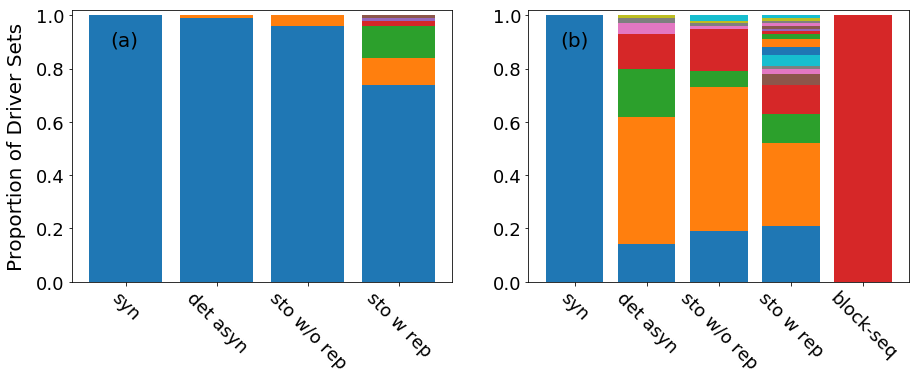

In [29]:
#driver selection based on different updating schedules (for unconstrained greedy selection)
#Drosophila
plt.figure(figsize=(15,5))
plt.subplot(121)
xvalues=[0,1,2,3]
yvalues=[1,0.99,0.96,0.74] #(0, 31, 33) [1,1,1,0.8] [1,0.99,0.96,0.74] -> attractor 4
yvalues1=[0,0.01,0.04,0.1] #(0, 7, 31, 32) [1-y for y in yvalues] [0,0.01,0.04,0.1] -> new attractor
yvalues2=[0,0,0,0.12] #(0, 9, 31, 32) -> new attractor
yvalues3=[0,0,0,0.02] #(0, 24, 31, 32) -> new attractor
yvalues4=[0,0,0,0.01] #(0, 15, 30, 32) -> new attractor
yvalues5=[0,0,0,0.01] #(1, 27, 31, 32) -> attractor 2 or 7?
plt.bar(xvalues,yvalues,label='Attractor 4')
plt.bar(xvalues,yvalues1,bottom=yvalues,label='New Attractor')
plt.bar(xvalues,yvalues2,bottom=[yvalues[i]+yvalues1[i] for i in range(4)])
plt.bar(xvalues,yvalues3,bottom=[yvalues[i]+yvalues1[i]+yvalues2[i] for i in range(4)])
plt.bar(xvalues,yvalues4,bottom=[yvalues[i]+yvalues1[i]+yvalues2[i]+yvalues3[i] for i in range(4)])
plt.bar(xvalues,yvalues5,bottom=[yvalues[i]+yvalues1[i]+yvalues2[i]+yvalues3[i]+yvalues4[i] for i in range(4)])
plt.ylim([0.0,1.02])
plt.xticks(xvalues,['syn','det asyn','sto w/o rep','sto w rep'],rotation=-45,fontsize=18)
plt.ylabel("Proportion of Driver Sets",fontsize=20,labelpad=10)
#plt.xlabel('Time',fontsize=20,position=(1.1,1),labelpad=10)
plt.yticks(fontsize=18)
#plt.xlim([0,t-1])
#plt.legend(loc='upper right',fontsize=20,framealpha=0.5) #bbox_to_anchor=(0.62, 0.5315)

#Yeast
plt.subplot(122)
#graph attractor basins for the unconstrained greedy selection process; G1 attractor driver is {0,4,6,11,15}
xvalues=[0,1,2,3,4]
yvalues=[1,0.14,0.19,0.21,0] #(1, 11, 12, 15) [1,0.2,0.1,0.2], [1,0.14,0.19,0.21,0]
yvalues1=[0,0.48,0.54,0.31,0] #(0, 15, 17) [0,0.6,0.4,0.2], [0,0.48,0.54,0.31,0]
yvalues2=[0,0.18,0.06,0.11,0] #(0, 13, 20) [0,0.2,0.3,0.3], [0,0.18,0.06,0.11,0]
yvalues3=[0,0.13,0.16,0.11,1] #(1, 6, 11, 16) [0,0,0.1,0.1], [0,0.13,0.16,0.11,1]
yvalues4=[0,0,0,0,0] #(1, 3, 6, 11, 20) [0,0,0.1,0], [0,0,0,0,0]
yvalues5=[0,0,0,0.04,0] #(1, 12, 16) [0,0,0,0.1], [0,0,0,0.04,0]
yvalues6=[0,0.04,0.01,0.02,0] #(1, 4, 21) [0,0,0,0.1], [0,0.04,0.01,0.02,0]
yvalues7=[0,0.02,0.01,0.01,0] #(1, 8, 21) [0,0.02,0.01,0.01,0]
yvalues8=[0,0.01,0.01,0,0] #(1, 14, 19) [0,0.01,0.01,0,0]
yvalues9=[0,0,0.02,0.04,0] #None (force=True should prevent this because all nodes will eventually be selected) [0,0,0.02,0.04,0]
yvalues10=[0,0,0,0.03,0] #(0, 10, 13)
yvalues11=[0,0,0,0.03,0] #(0, 14, 17)
yvalues12=[0,0,0,0.02,0] #(0, 3, 11, 12, 18)
yvalues13,yvalues14,yvalues15,yvalues16,yvalues17,yvalues18,yvalues19=[0,0,0,0.01,0],[0,0,0,0.01,0],[0,0,0,0.01,0],[0,0,0,0.01,0],[0,0,0,0.01,0],[0,0,0,0.01,0],[0,0,0,0.01,0]
plt.bar(xvalues,yvalues)
plt.bar(xvalues,yvalues1,bottom=yvalues)
for y in range(2,20):
    string='yvalues[i]'
    for z in range(1,y):
        string+='+yvalues'+str(z)+'[i]'
    #print eval('['+string+' for i in range(5)]'),'yvalues'+str(y)
    plt.bar(xvalues,eval('yvalues'+str(y)),bottom=eval('['+string+' for i in range(5)]'))
plt.ylim([0.0,1.02])
plt.xticks(xvalues,['syn','det asyn','sto w/o rep','sto w rep','block-seq'],rotation=-45,fontsize=18)
#plt.ylabel("Proportion of Driver Sets",fontsize=20,labelpad=10)
#plt.xlabel('Iterations',fontsize=16)
plt.yticks(fontsize=18)
#plt.xlim([0,t-1])
#plt.legend(loc='upper left',fontsize=18,framealpha=0.5) #bbox_to_anchor=(0.62, 0.5315)
plt.figtext(0.16, 0.78, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.577, 0.78, "(b)", wrap=True, horizontalalignment='left', fontsize=20) #0.69

Text(0.715,0.81,'(b)')

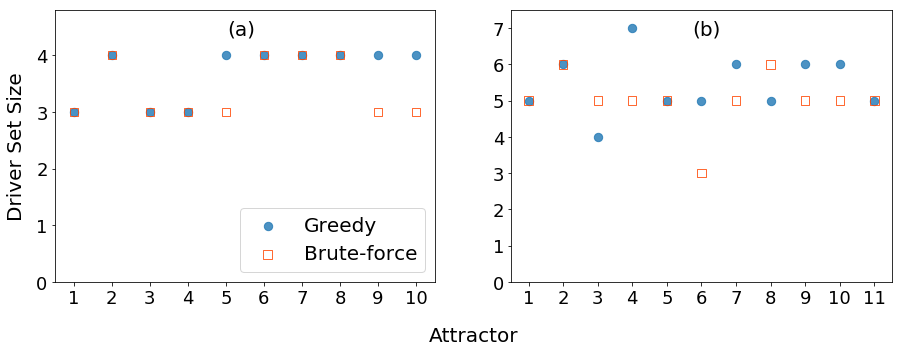

In [74]:
#driver selection vs brute-force selection for attractors
#Drosophila
plt.figure(figsize=(15,5))
plt.subplot(121)
mf_solutions=[{1,32,31},{0,32,31,3},{1,33,31},{0,33,31},{1,33,30,17},{0,33,30,16},{0,32,31,2},{0,33,30,17},{0,32,30,17},{1,32,30,17}]
bf_solutions=[{1,32,31},{0,32,31,3},{1,33,31},{0,33,31},{1,33,30},{0,33,30,16},{0,32,31,2},{0,33,30,17},{0,32,30},{1,32,30}]

plt.scatter([i for i in range(10)],[len(x) for x in mf_solutions],label='Greedy',alpha=0.8,s=70)
plt.scatter([i for i in range(10)],[len(x) for x in bf_solutions],label='Brute-force',alpha=0.8,marker='s',facecolors='none',edgecolors='orangered',s=70)
plt.xlim([-0.5,9.5])
plt.xticks([i for i in range(10)],range(1,11),fontsize=18)
plt.ylabel("Driver Set Size",fontsize=20,labelpad=10)
plt.xlabel("Attractor",fontsize=20,position=(1.1,1),labelpad=20)
#plt.title("Size of Approximate \n and Actual Driver Sets",y=1.05)
plt.yticks(fontsize=18)
plt.ylim([0,4.8])
plt.legend(loc='lower right',fontsize=20,framealpha=0.8) #bbox_to_anchor=(0.62, 0.5315)

#Yeast
plt.subplot(122)
mf_solutions=[{0,11,4,6,15},{1,5,7,10,12,17},{1,13,5,7},{0,4,6,10,12,14,16},{1,10,5,6,17},{0,16,12,5,6},{0,4,7,11,12,15},{1,10,4,13,7},{0,4,7,11,12,14},{0,4,6,10,12,15},{0,11,4,14,6}]
bf_solutions=[{0,11,15,4,6},{1,10,12,17,5,7},{1,13,17,5,7},{0,10,14,18,4},{1,10,17,5,6},{0,18,5},{0,11,15,4,7},{1,10,13,17,4,7},{0,11,14,4,7},{0,10,15,4,6},{0,11,14,4,6}] #non-fvs

plt.scatter([i for i in range(11)],[len(x) for x in mf_solutions],label='Greedy',alpha=0.8,s=70)
plt.scatter([i for i in range(11)],[len(x) for x in bf_solutions],label='Brute-force',alpha=0.8,marker='s',facecolors='none',edgecolors='orangered',s=70)
plt.xlim([-0.5,10.5])
plt.xticks([i for i in range(11)],range(1,12),fontsize=18)
#plt.ylabel("Driver Set Size",fontsize=20,labelpad=10)
#plt.xlabel("Attractor",fontsize=20,labelpad=10)
#plt.title("Size of Approximate \n and Actual Driver Sets",y=1.05)
plt.yticks(fontsize=18)
plt.ylim([0,7.5])
#plt.legend(loc='lower left',fontsize=20,framealpha=0.8) #bbox_to_anchor=(0.62, 0.5315)

plt.figtext(0.285, 0.81, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.715, 0.81, "(b)", wrap=True, horizontalalignment='left', fontsize=20)

In [10]:
#Cell Collective; READ in from json and get rid of unicode representations
cell_stats=json.load(open( "cell_collective_statistics.json" ))
cell_stats={str(n): {str(key): cell_stats[n][key] for key in cell_stats[n]} for n in cell_stats}
cell_drivers=json.load(open( "cell_collective_drivers.json" ))
cell_drivers={str(n): {str(key): cell_drivers[n][key] for key in cell_drivers[n]} for n in cell_drivers}
with open('cell_collective_drivers_avg_attractor.txt') as f:
    drivers=eval(f.read())
#add in drosophila to cell_drivers
cell_drivers['Body Segmentation In Drosophila 2013']={'resolved': None, 'size': 3, 'time': None}
len(drivers)

43

Text(0.835,0.88,'(c)')

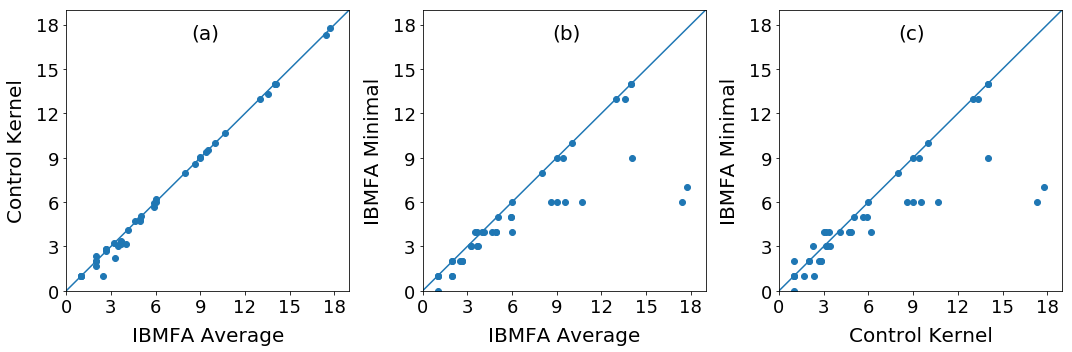

In [11]:
#Cell Collective, IBMFA compared to control kernels
xvalues=range(len(drivers))
sorted_networks=sorted(drivers,key=lambda x: drivers[x]['kernel'])
#for n in sorted_networks: print n,drivers[n]['kernel']
yvalues1=[drivers[n]['greedy'] for n in sorted_networks]
yvalues2=[drivers[n]['kernel'] for n in sorted_networks]
yvalues3=[cell_drivers[n]['size'] for x in sorted_networks for n in cell_drivers if x.lower()==n.lower()]
#print len(yvalues1),len(yvalues2),len(yvalues3)

#1x1 plots
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(yvalues1,yvalues2)
plt.plot(xvalues[:20],xvalues[:20]) #x=y line, also acts as an axis limit
plt.xlabel("IBMFA Average",fontsize=20,labelpad=10)
plt.ylabel("Control Kernel",fontsize=20,labelpad=10)
plt.xticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18) #ticks, labels
plt.yticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18)
plt.xlim([0,19])
plt.ylim([0,19])
#plt.title("Comparison of IBMFA Average to Network Control Kernels", y=1.05)

plt.subplot(132)
plt.scatter(yvalues1,yvalues3)
plt.plot(xvalues[:20],xvalues[:20]) #x=y line, also acts as an axis limit
plt.xlabel("IBMFA Average",fontsize=20,labelpad=10)
plt.ylabel("IBMFA Minimal",fontsize=20,labelpad=10)
plt.xticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18) #ticks, labels
plt.yticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18)
plt.xlim([0,19])
plt.ylim([0,19])
#plt.title("Comparison of IBMFA Average to IBMFA Minimal Seed", y=1.05)

plt.subplot(133)
plt.scatter(yvalues2,yvalues3)
plt.plot(xvalues[:20],xvalues[:20]) #x=y line, also acts as an axis limit
plt.xlabel("Control Kernel",fontsize=20,labelpad=10)
plt.ylabel("IBMFA Minimal",fontsize=20,labelpad=10)
plt.xticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18) #ticks, labels
plt.yticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18)
plt.xlim([0,19])
plt.ylim([0,19])
#plt.title("Comparison of IBMFA Minimal Seed to Network Control Kernels", y=1.05)

plt.tight_layout()
plt.figtext(0.18, 0.88, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.515, 0.88, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.835, 0.88, "(c)", wrap=True, horizontalalignment='left', fontsize=20) #0.83

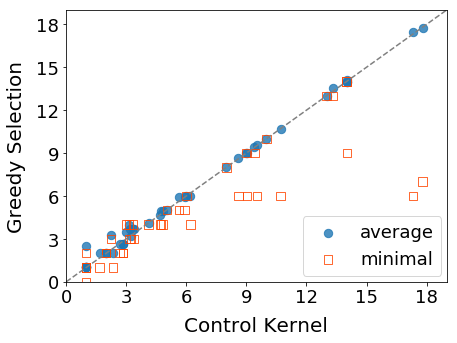

In [12]:
#alternatively, just show panel d from Fig. 3
plt.figure(figsize=(15,5))
plt.subplot(121) #for consistent sizing
plt.scatter(yvalues2,yvalues1,alpha=0.8,s=70,label='average')
plt.scatter(yvalues2,yvalues3,alpha=0.8,marker='s',facecolors='none',edgecolors='orangered',s=70,label='minimal')
plt.plot(xvalues[:20],xvalues[:20],'--',color='grey') #x=y line, also acts as an axis limit
plt.ylabel("Greedy Selection",fontsize=20,labelpad=10)
plt.xlabel("Control Kernel",fontsize=20,labelpad=10)
plt.xticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18) #ticks, labels
plt.yticks([0,3,6,9,12,15,18],[0,3,6,9,12,15,18],fontsize=18)
plt.xlim([0,19])
plt.ylim([0,19])
#plt.title("Comparison of IBMFA Average to Network Control Kernels", y=1.05)
plt.legend(loc='lower right',fontsize=18,framealpha=0.8,bbox_to_anchor=(1.01, -0.01))

In [3]:
#read in driver node properties
with open("cell_driver_node_properties_inputs.txt") as f:
    driver_nodes=eval(f.read())
len(driver_nodes)

74

(0.24152566980158244, 6.565725855622545e-40) (0.23499749578724904, 2.377452688906726e-08)
2911 80 0.0267469073888 37.3875
2911 80 0.0267558528428


Text(0.805,0.88,'(c)')

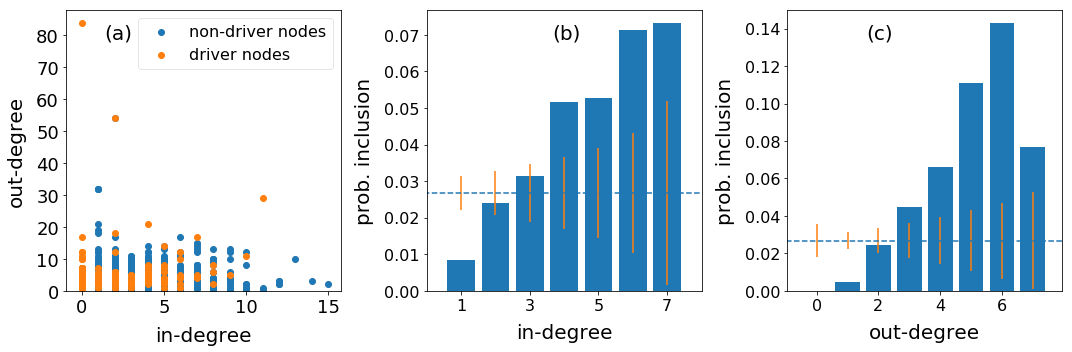

In [42]:
#scatter plot of in-degree, out-degree
from collections import Counter
import scipy.stats as st

plt.figure(figsize=(15,5))
plt.subplot(131)
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
xvalues0=[x for n in driver_nodes for i,x in enumerate(driver_nodes[n]['in-degree']) if not driver_nodes[n]['included'][i]] #non-drivers
yvalues0=[x for n in driver_nodes for i,x in enumerate(driver_nodes[n]['out-degree']) if not driver_nodes[n]['included'][i]] #non-drivers
xvalues1=[x for n in driver_nodes for i,x in enumerate(driver_nodes[n]['in-degree']) if driver_nodes[n]['included'][i]] #drivers
yvalues1=[x for n in driver_nodes for i,x in enumerate(driver_nodes[n]['out-degree']) if driver_nodes[n]['included'][i]] #drivers
yvalues2=[x for n in driver_nodes for i,x in enumerate(driver_nodes[n]['out-degree']) if not driver_nodes[n]['included'][i] and driver_nodes[n]['in-degree'][i]] #non-drivers, non-inputs
yvalues3=[x for n in driver_nodes for i,x in enumerate(driver_nodes[n]['out-degree']) if driver_nodes[n]['included'][i] and driver_nodes[n]['in-degree'][i]] #drivers, non-inputs
#print len(yvalues0),len(yvalues1),len(yvalues2),len(yvalues3)
#labels=[colors[x] for n in driver_nodes for x in driver_nodes[n]['included']]
plt.scatter(xvalues0,yvalues0,label='non-driver nodes') #c=labels
plt.scatter(xvalues1,yvalues1,label='driver nodes')
plt.xlabel("in-degree",fontsize=20,labelpad=10)
plt.ylabel("out-degree",fontsize=20,labelpad=10)
plt.xticks([0,5,10,15],fontsize=18)
plt.yticks(fontsize=18)
#plt.ylim([0,25]) #without outliers
#plt.xlim([0,10.5]) #without outliers
plt.ylim([0,88])
plt.legend(loc='upper right',fontsize=16,framealpha=0.5)
print pearsonr(xvalues0,yvalues0),pearsonr(xvalues1,yvalues1)

#probability of inclusion in the minimal driver set by in-degree
plt.subplot(132)
cx0,cx1=Counter(xvalues0),Counter(xvalues1)
cx0[0]=0 #add null value
total={x:cx0[x]+cx1[x] for x in cx0}
xvalues,yvalues=range(1,8),[float(cx1[x])/total[x] for x in range(1,8)]
#print cx1,total,yvalues
#average=float(sum([cx1[x] for x in cx1]))/sum([total[x] for x in total])
average=float(sum([cx1[x] for x in cx1 if x]))/sum([total[x] for x in total if x]) #remove inputs
print sum([cx0[x] for x in cx0 if x]),sum([cx1[x] for x in cx1 if x]),average,1/average
plt.bar(xvalues,yvalues)
plt.plot([x-1 for x in range(12)],[average for x in range(12)],'--') #average line
xci,xbinom=[],[] #95% confidence interval
for i in xvalues:
    data=[1 for x in range(cx1[i])]
    data.extend([0 for x in range(cx0[i])])
    if len(data)<30: #use t-statistic
        xci.append(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))
    else: #use z-statistic
        xci.append(st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data)))
    N_k,p,N_d=total[i],average,total[i]
    #print N_k,p,N_d,N_k * p * (1 - p)
    xbinom.append(1 * math.sqrt(N_k * p * (1 - p))/N_d)
#print xci,xbinom
lows=[yvalues[i]-x[0] if not math.isnan(x[0]) else 0 for i,x in enumerate(xci)]
highs=[x[1]-yvalues[i] if not math.isnan(x[1]) else 0 for i,x in enumerate(xci)]
#plt.errorbar(xvalues, yvalues, yerr=lows, xerr=None, fmt='none') #note that yerr is symmetric
plt.errorbar(xvalues, [average for x in xvalues], yerr=xbinom, xerr=None, fmt='none')
plt.xlabel("in-degree",fontsize=20,labelpad=10)
plt.ylabel("prob. inclusion",fontsize=20,labelpad=10)
plt.xticks([1,3,5,7,9],[1,3,5,7,9],fontsize=16)
#plt.xticks([0,2,4,6,8],[0,2,4,6,8],fontsize=16) #alternate if including inputs as 0
plt.yticks(fontsize=16)
plt.xlim([0,8]) #10
#plt.ylim([0,.23])
#plt.ylim([0,1.0]) #alternate if including inputs as 0

#probability of inclusion in the minimal driver set by out-degree
plt.subplot(133)
#cy0,cy1=Counter(yvalues0),Counter(yvalues1)
cy0,cy1=Counter(yvalues2),Counter(yvalues3) #remove input nodes
total={x:cy0[x]+cy1[x] for x in cy0}
xvalues,yvalues=range(0,8),[float(cy1[x])/total[x] for x in range(0,8)]
#print cy1,total,yvalues
print sum([cy0[x] for x in cy0]),sum([cy1[x] for x in cy1]),float(sum([cy1[x] for x in cy1]))/sum([total[x] for x in total])
plt.bar(xvalues,yvalues)
plt.plot([x-1 for x in range(15)],[average for x in range(15)],'--') #average line
yci,ybinom=[],[] #95% confidence interval
for i in xvalues:
    data=[1 for x in range(cy1[i])]
    data.extend([0 for x in range(cy0[i])])
    if len(data)<30: #use t-statistic
        yci.append(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))) #loc=np.mean(data)
    else: #use z-statistic
        yci.append(st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))) #loc=np.mean(data)
    N_k,p,N_d=sum([total[x] for x in total]),float(cy1[i])/total[i],total[i]
    N_k,p,N_d=total[i],average,total[i]
    #print N_k,p,N_d,N_k * p * (1 - p)
    ybinom.append(1 * math.sqrt(N_k * p * (1 - p))/N_d)
#print yci,ybinom
lows=[yvalues[i]-x[0] if not math.isnan(x[0]) else 0 for i,x in enumerate(yci)]
highs=[x[1]-yvalues[i] if not math.isnan(x[1]) else 0 for i,x in enumerate(yci)]
#plt.errorbar(xvalues, yvalues, yerr=lows, xerr=None, fmt='none') #note that yerr is symmetric
plt.errorbar(xvalues, [average for x in xvalues], yerr=ybinom, xerr=None, fmt='none')
plt.xlabel("out-degree",fontsize=20,labelpad=10)
plt.ylabel("prob. inclusion",fontsize=20,labelpad=10)
plt.xticks([0,2,4,6,8,10],[0,2,4,6,8,10],fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([-.95,7.95]) #[-1,12.5]
#plt.ylim([0,.43])

plt.tight_layout()
plt.figtext(0.10, 0.88, "(a)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.515, 0.88, "(b)", wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.805, 0.88, "(c)", wrap=True, horizontalalignment='left', fontsize=20)